# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 7.5.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [ ]:
import numpy as np
%pylab inline
import pandas as pd  # your favorite data package

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# your code
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')  # your favorite visualization package

Populating the interactive namespace from numpy and matplotlib


## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!wget  -O 'train.csv' -q 'https://www.dropbox.com/scl/fi/77b33blpevxwuysx80b6i/train.csv?rlkey=u5fg3cmtb2ob1rq4a9za9yepy&st=dtbqcptt&dl=0'
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(1458644, 11)

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df.drop(labels='dropoff_datetime', axis=1, inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Text(0.5, 1.0, 'trip_distributions')

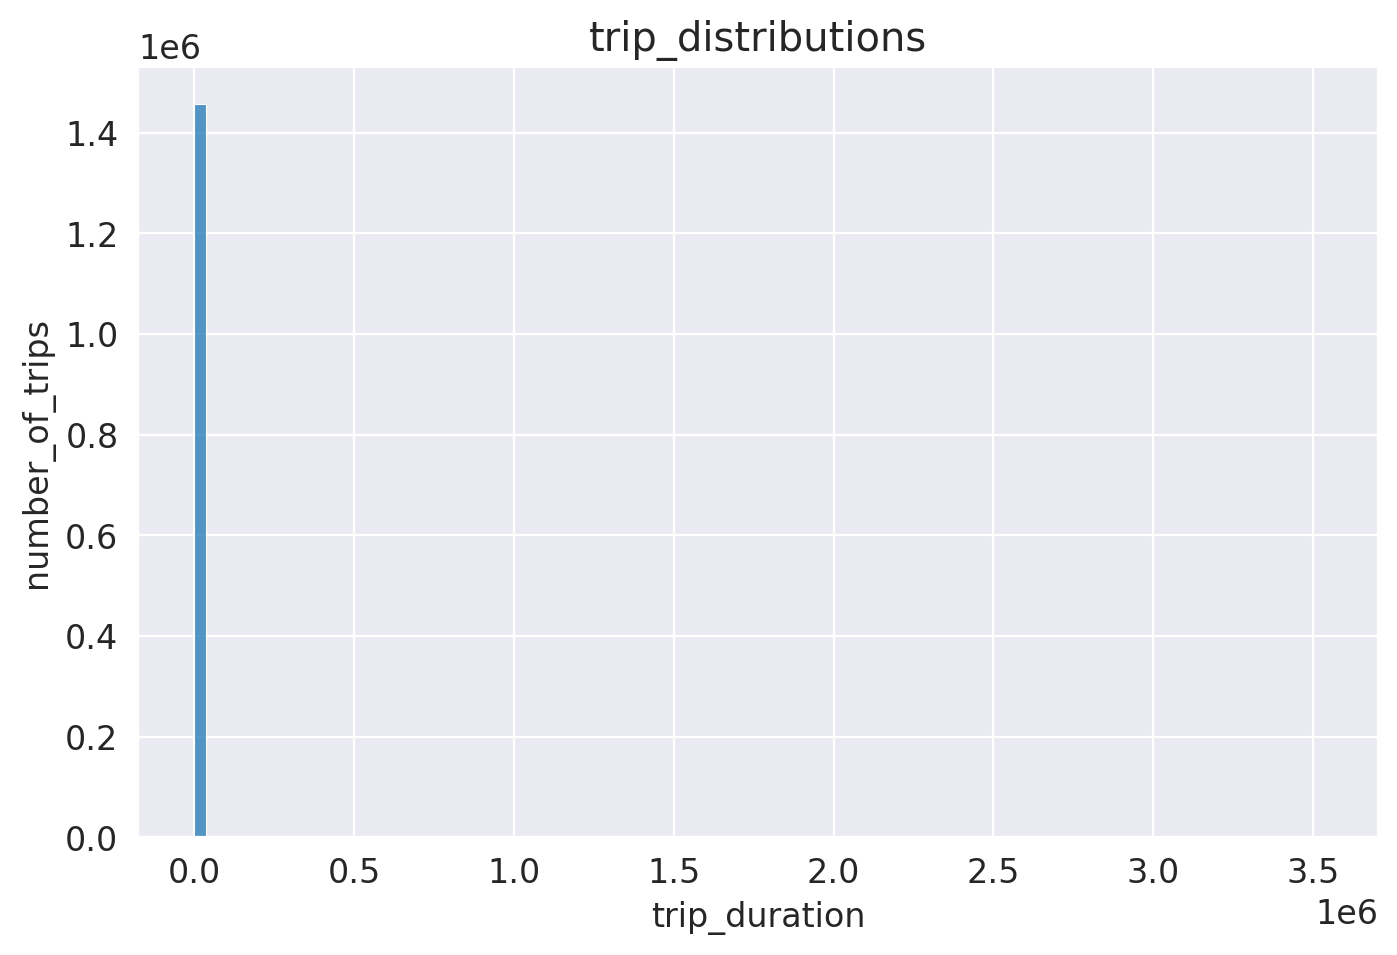

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots()
sns.histplot(df['trip_duration'], ax = ax, bins = 100)
ax.set_xlabel('trip_duration')
ax.set_ylabel('number_of_trips')
ax.set_title('trip_distributions')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?



---


Судя по гистограмме, мы можем сказать, что у нас есть очень большой разброс данных. Все значения целевой переменной в основном варьируются от 1 до 12500 секунд(на глаз наш столбик занимает 1/40 часть деления). Тем не менее, мы не можем сделать точного вывода о выбросах, поскольку не можем увидеть, сколько значений соответствует каждому из делений (bins). Понятно, что их относительно мало(как мы видим, в видимом столбце получается более 1.400.000 значений, а всего было загружено чуть более 1458000 значений), однако это не говорит нам о том, что эти значения являются выбросами, ведь их количества тоже могут исчисляться тысячами, что будет говорить нам о возможности поездок и на большое количество часов(странно было бы, если бы происходили целые тысячи ошибок с таксометрами, ведь сервисы такси стараются следить за приборами и недопускать постоянных ошибок). Если даже и пытаться увеличивать количество делений(bins) - то все равно из-за наличия очень больших значений гистограмма будет похожа на ту, которую мы видим при 100 делениях, поэтому в целом по гистограмме мы не можем сделать много выводов о нашей целевой переменной.


---



В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?



---


Авторы выбрали RMSLE, потому что, как мы уже убедились, целевая переменная может принимать огромные значения. Скорее всего, это выбросы. RMSE заставляет подстраиваться модель под выбросы и не выдавать на нормальных данных адекватные значения, поскольку на выбросах ошибка модели будет всегда огромной, если она не будет подстраиваться под них, а будет стараться обучаться на нормальных данных. Если же использовать логарифмическую шкалу - то даже выбросы начинают не так сильно отличаться от нормальных данных, а поскольку нормальных данных намного больше, чем выбросов - то модель будет лучше подстраиваться под нормальные данные и лучше предсказывать.


---





На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ



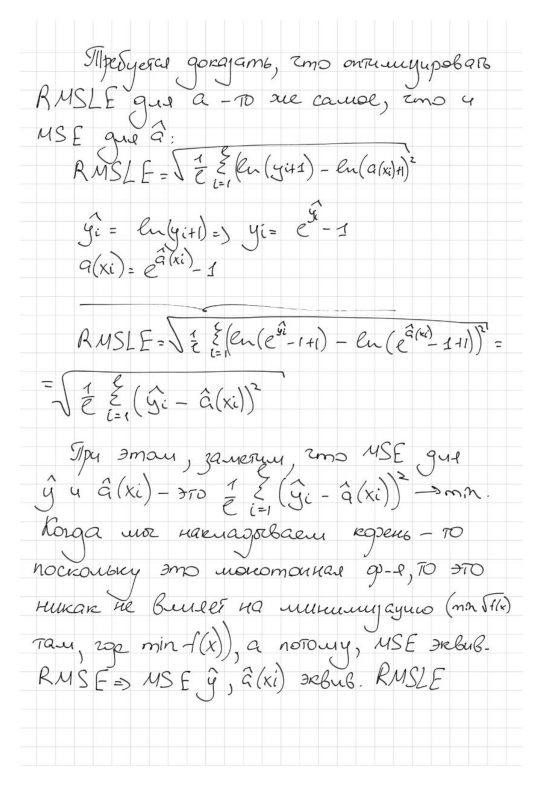

In [ ]:
from PIL import Image

image_path = '/content/dok_vo_RMSLE.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

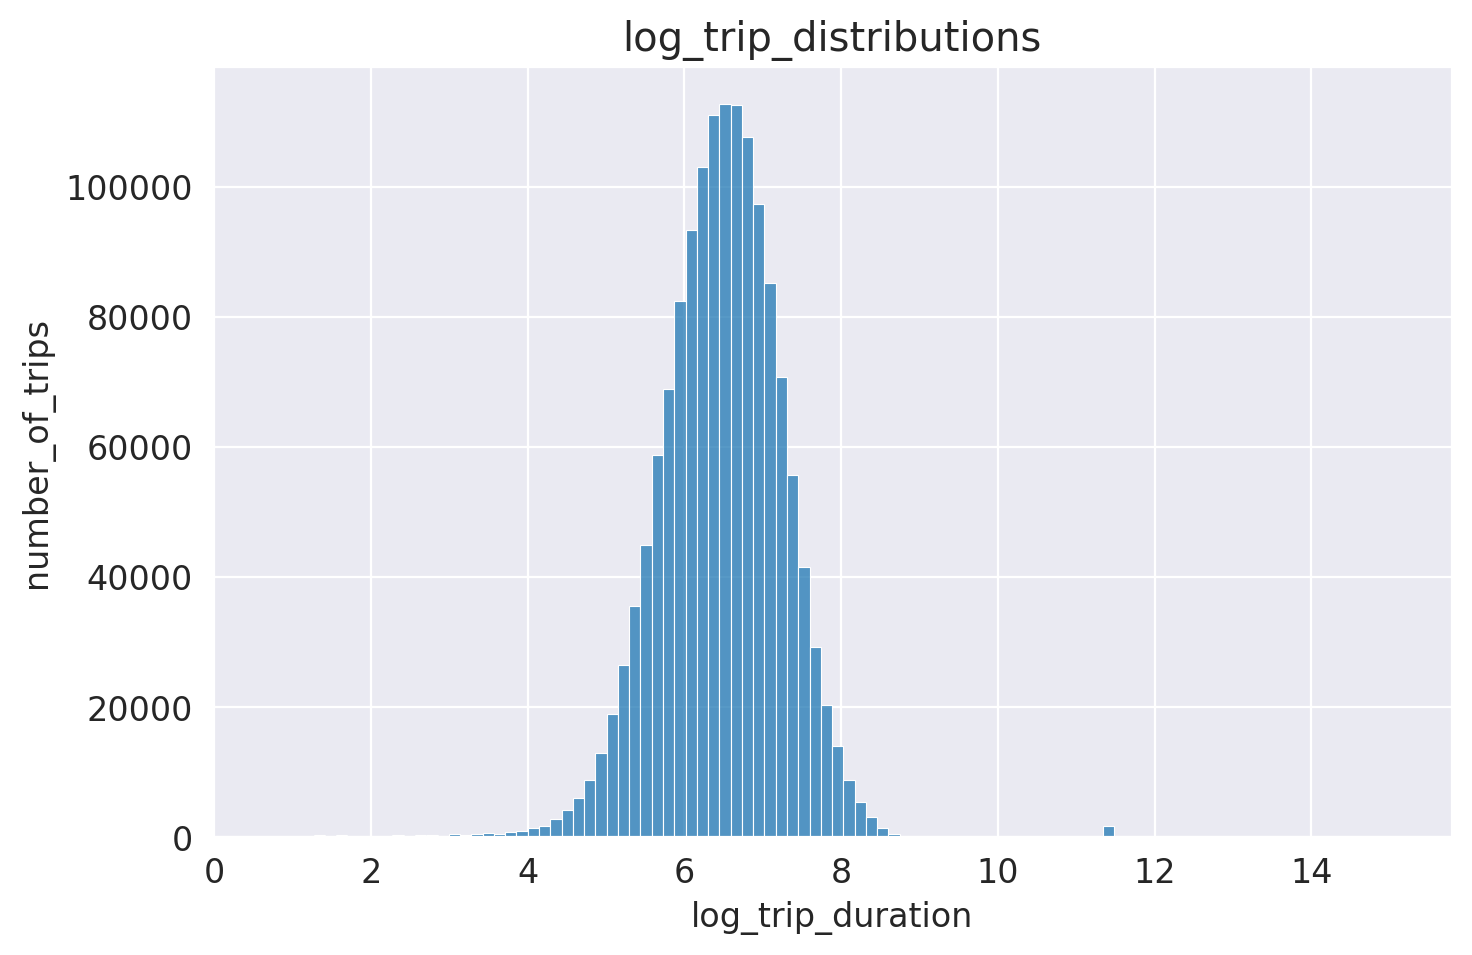

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_trip_duration'] = np.log1p(df['trip_duration'])
fig, ax = plt.subplots()
sns.histplot(df['log_trip_duration'], ax = ax, bins = 100)
ax.set_xlabel('log_trip_duration')
ax.set_ylabel('number_of_trips')
ax.set_title('log_trip_distributions')
df.drop('trip_duration', axis=1, inplace=True)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    error = (log1p_y_pred - log1p_y_true)**2
    return np.sqrt(np.mean(error))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

rmsle_best_const = rmsle(df['log_trip_duration'], np.mean(df['log_trip_duration']))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


Text(0.5, 1.0, 'Зависимость количества поездок от дня')

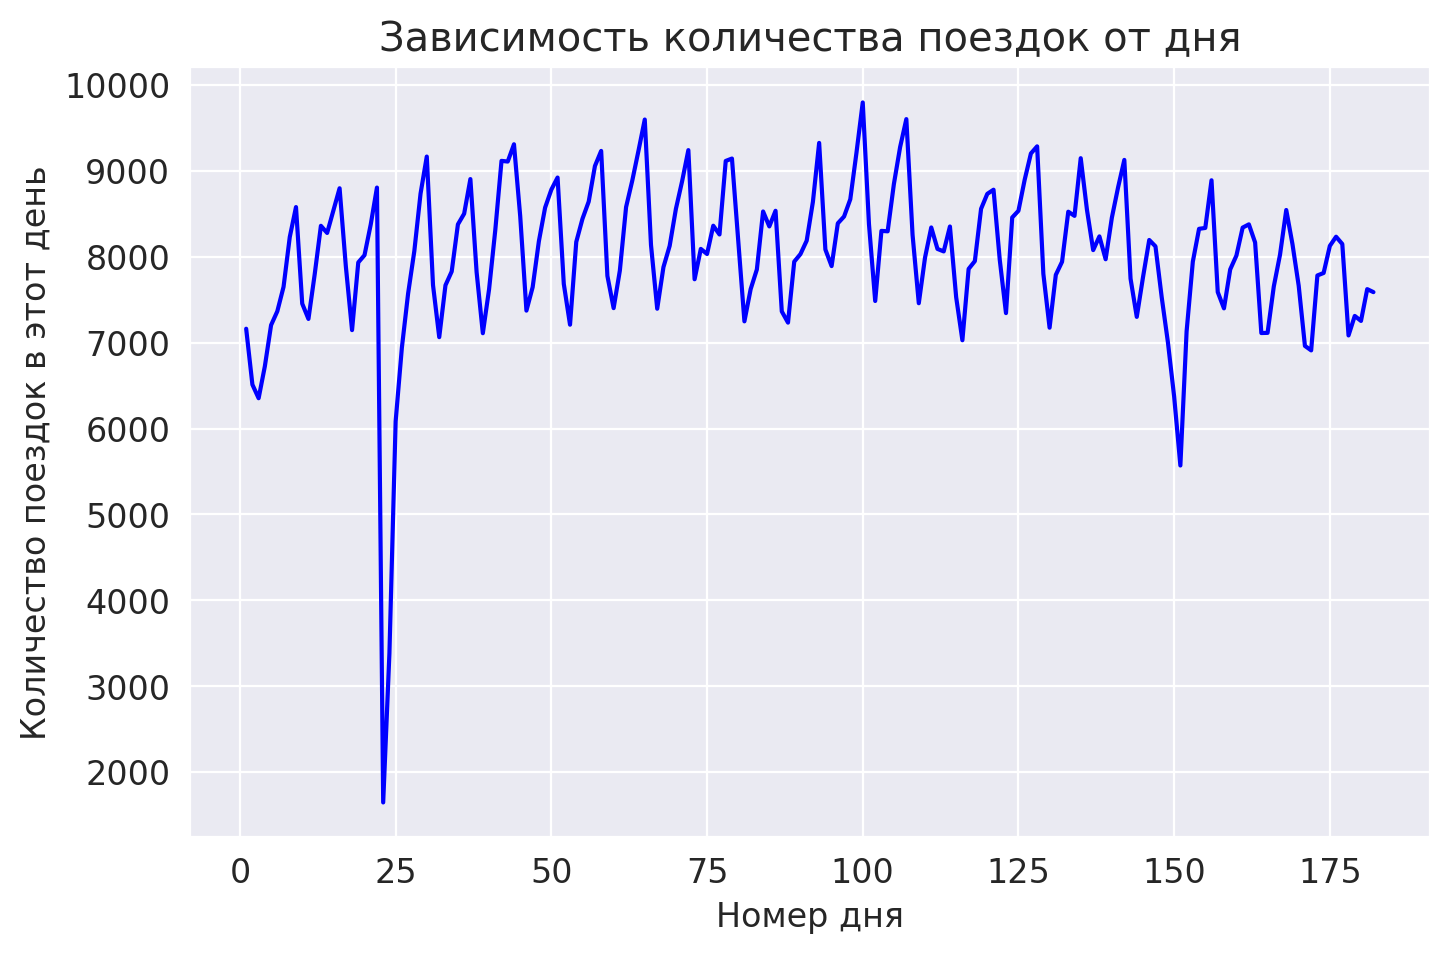

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day_of_trip'] = df['pickup_datetime'].dt.dayofyear
common_days = df.groupby('day_of_trip')['day_of_trip'].count()
fig, ax = plt.subplots()
x = list(common_days.index)
y = common_days
sns.lineplot(x = x, y = y, color = 'blue', ax = ax)
ax.set_xlabel('Номер дня')
ax.set_ylabel('Количество поездок в этот день')
ax.set_title('Зависимость количества поездок от дня')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.


In [ ]:
list_of_dates = list(common_days[common_days == common_days.min()].index)
common_days_copy = common_days.copy()
common_days_copy.drop(list_of_dates[0], inplace=True)
new_list_of_dates = list(common_days_copy[common_days_copy == common_days_copy.min()].index) + list_of_dates
common_days_copy.drop(new_list_of_dates[0], inplace=True)
new_list_of_dates_1 = list(common_days_copy[common_days_copy == common_days_copy.min()].index) + new_list_of_dates
new_list_of_dates_1
#я сделал поиск минимума три раза, поскольку два первых минимума находятся в два дня рядом, в которые и происходило третье событие.
#а вот следующий минимум уже соответствует другому событию

[151, 24, 23]

23 января 2016 года в Нью-Йорке из-за снежной бури «Джонас» губернатор штата Нью-Йорк Эндрю Куомо полностью прекратил автомобильное движение. Запрет продлился до тех пор, пока погода не наладилась.

Что касается второй даты 30 мая 2016 года: В реку Гудзон в Нью-Йорке упал малый самолет 28 мая. В связи с этим на несколько дней несколько улиц в северо-западной части нью-йоркского района Манхеттен были временно перекрыты, где и проходит самое большое количество поездок, а потому поездки сильно упали, ведь людям незачем было пользоваться такси, если они не могли доехать до работы.


Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

Text(0.5, 1.0, 'Зависимость количества поездок от дня недели')

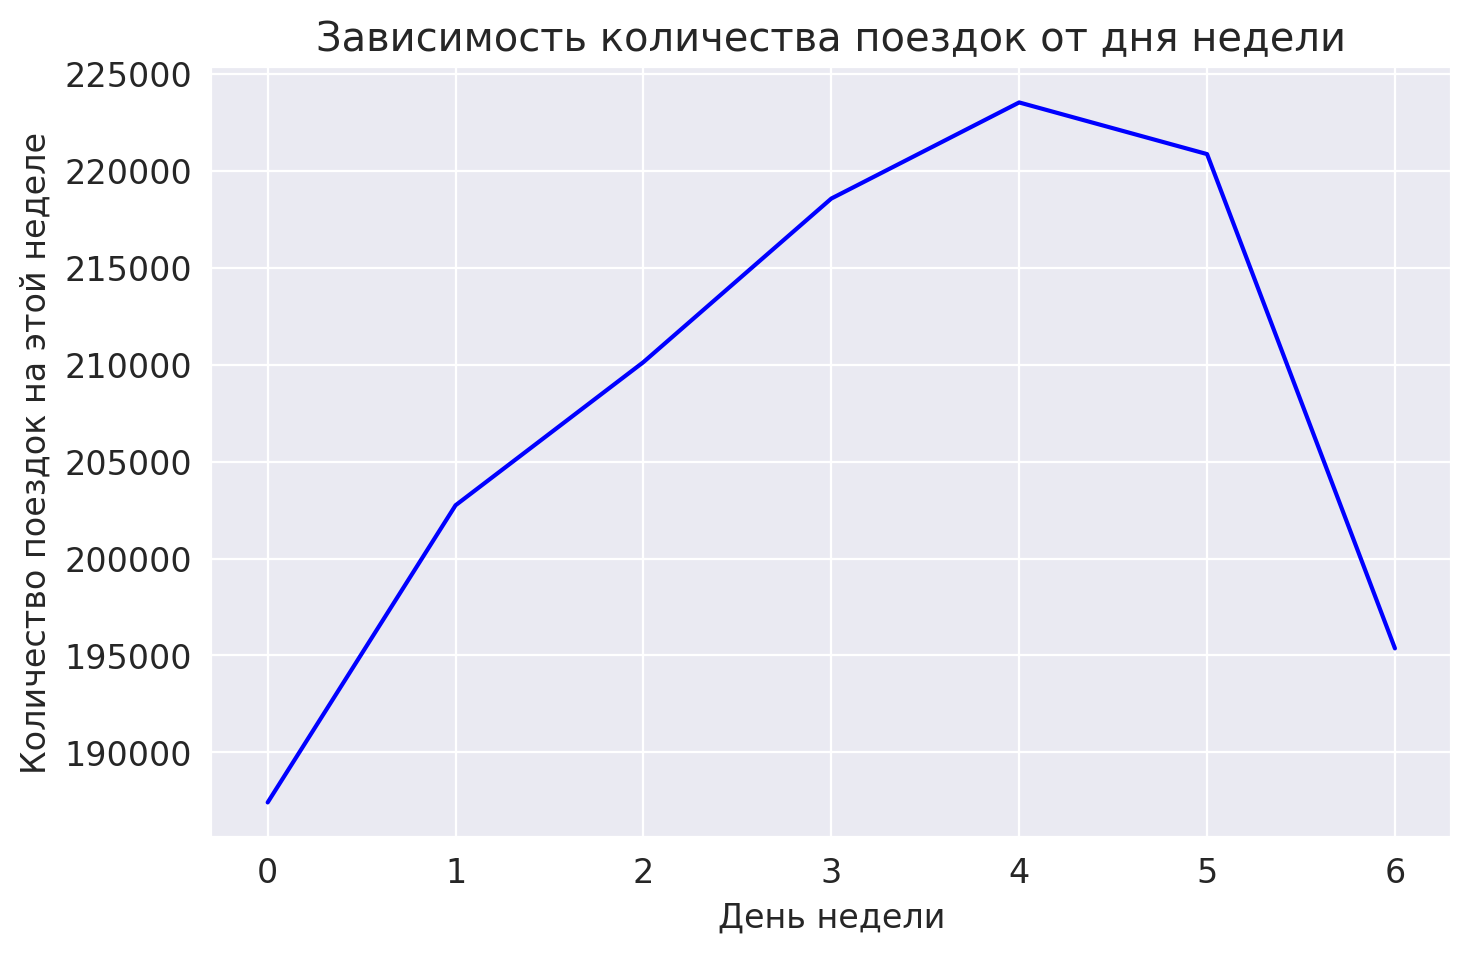

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
common_weeks = df.groupby('day_of_week')['id'].count()
fig, ax = plt.subplots()
x = list(common_weeks.index)
y = common_weeks
sns.lineplot(x = x, y = y, color = 'blue', ax = ax)
ax.set_xlabel('День недели')
ax.set_ylabel('Количество поездок на этой неделе')
ax.set_title('Зависимость количества поездок от дня недели')

Text(0.5, 1.0, 'Зависимость количества поездок от часа в сутках')

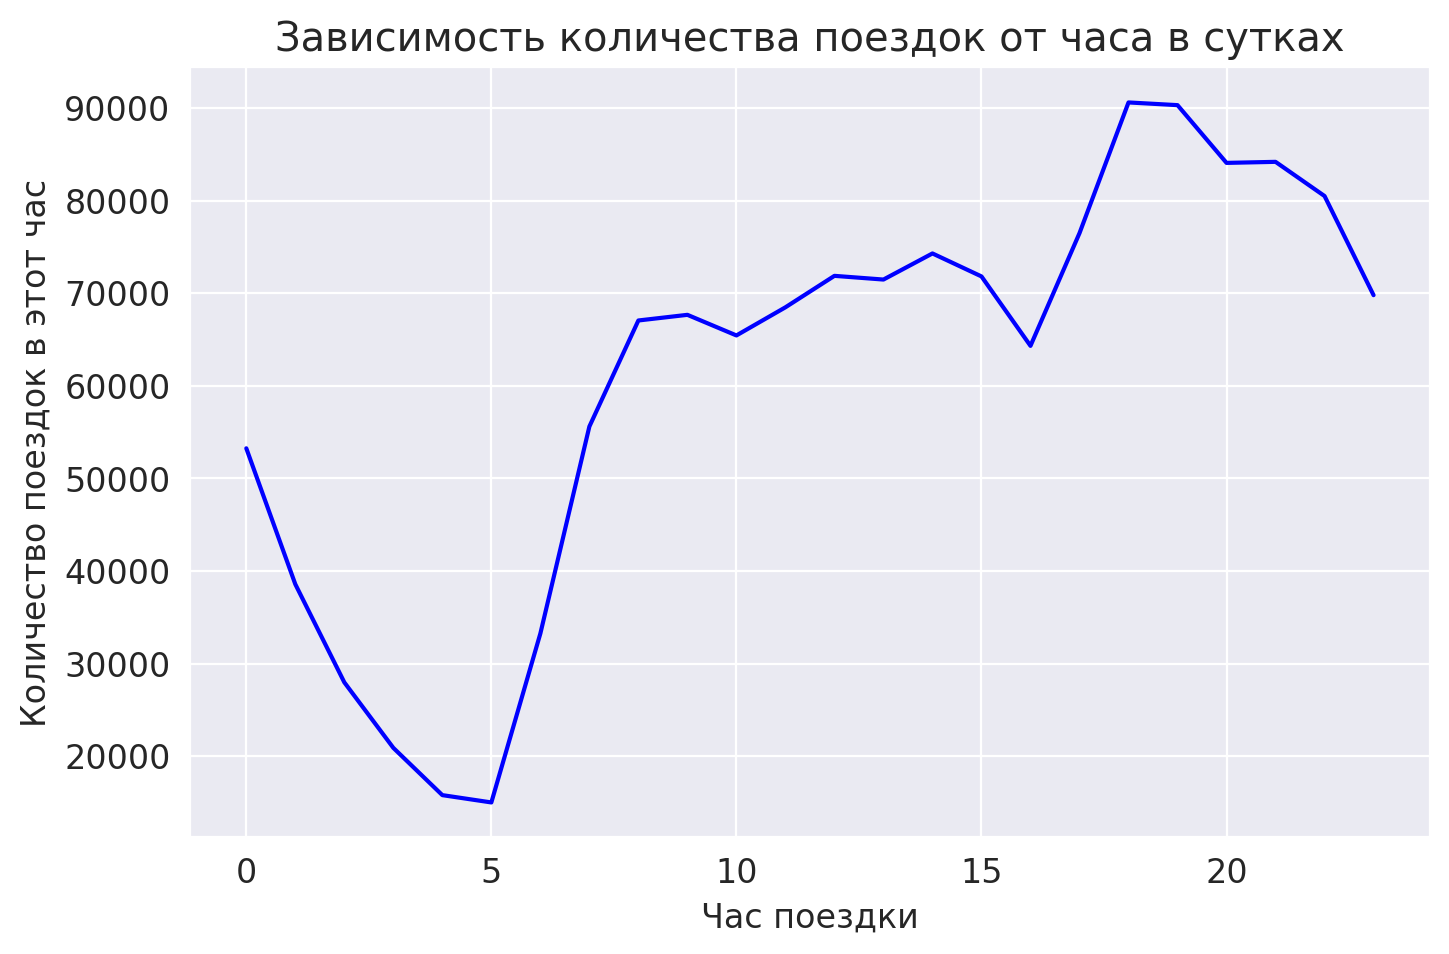

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['hour_of_trip'] = df['pickup_datetime'].dt.hour
common_hours = df.groupby('hour_of_trip')['hour_of_trip'].count()
fig, ax = plt.subplots()
x = list(common_hours.index)
y = common_hours
sns.lineplot(x = x, y = y, color = 'blue', ax = ax)
ax.set_xlabel('Час поездки')
ax.set_ylabel('Количество поездок в этот час')
ax.set_title('Зависимость количества поездок от часа в сутках')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Text(0.5, 1.0, 'Количество поездок в данный час в разные месяцы')

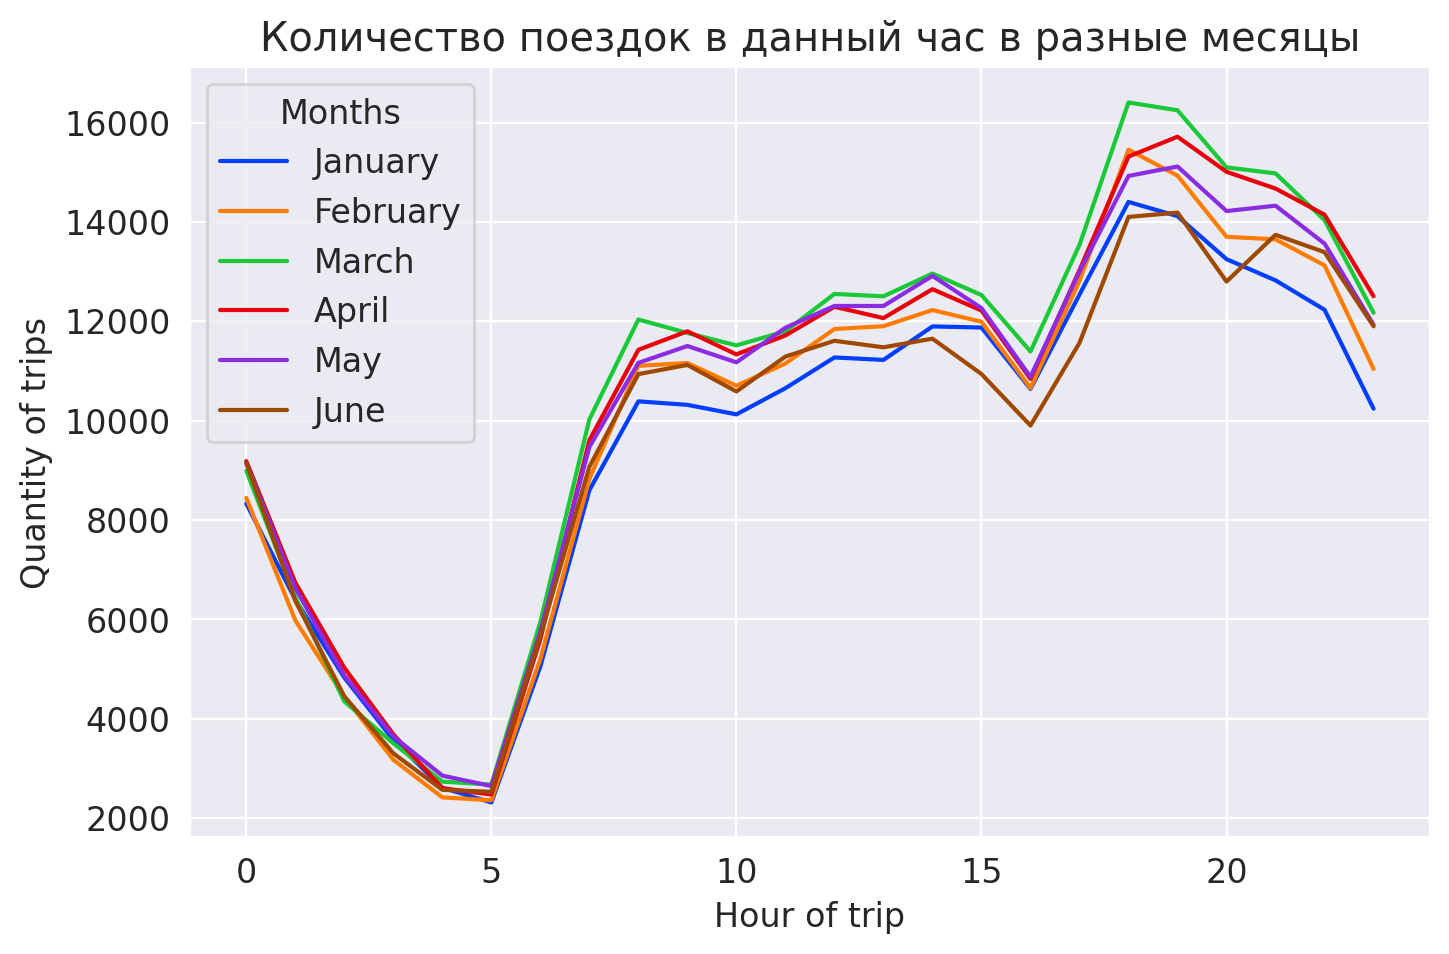

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['month_of_trip'] = df['pickup_datetime'].dt.month
common_hours_and_month = df.groupby(['month_of_trip', 'hour_of_trip'], as_index = False)['id'].count()
months = ['January', 'February', 'March', 'April', 'May', 'June']
common_hours_and_month['month_of_trip'] = common_hours_and_month['month_of_trip'].astype(str)
for i in range(0,6):
    month_ind = i + 1
    month_ind = str(month_ind)
    common_hours_and_month.loc[(common_hours_and_month['month_of_trip'] == month_ind), 'month_of_trip'] = months[i]
fig, ax = plt.subplots()
sns.lineplot(x = 'hour_of_trip', y = 'id', hue = 'month_of_trip', data = common_hours_and_month, ax = ax, palette = 'bright')
ax.legend(title = 'Months')
ax.set_xlabel('Hour of trip')
ax.set_ylabel('Quantity of trips')
ax.set_title('Количество поездок в данный час в разные месяцы')

Text(0.5, 1.0, 'Количество поездок в данный час в разные дни недели')

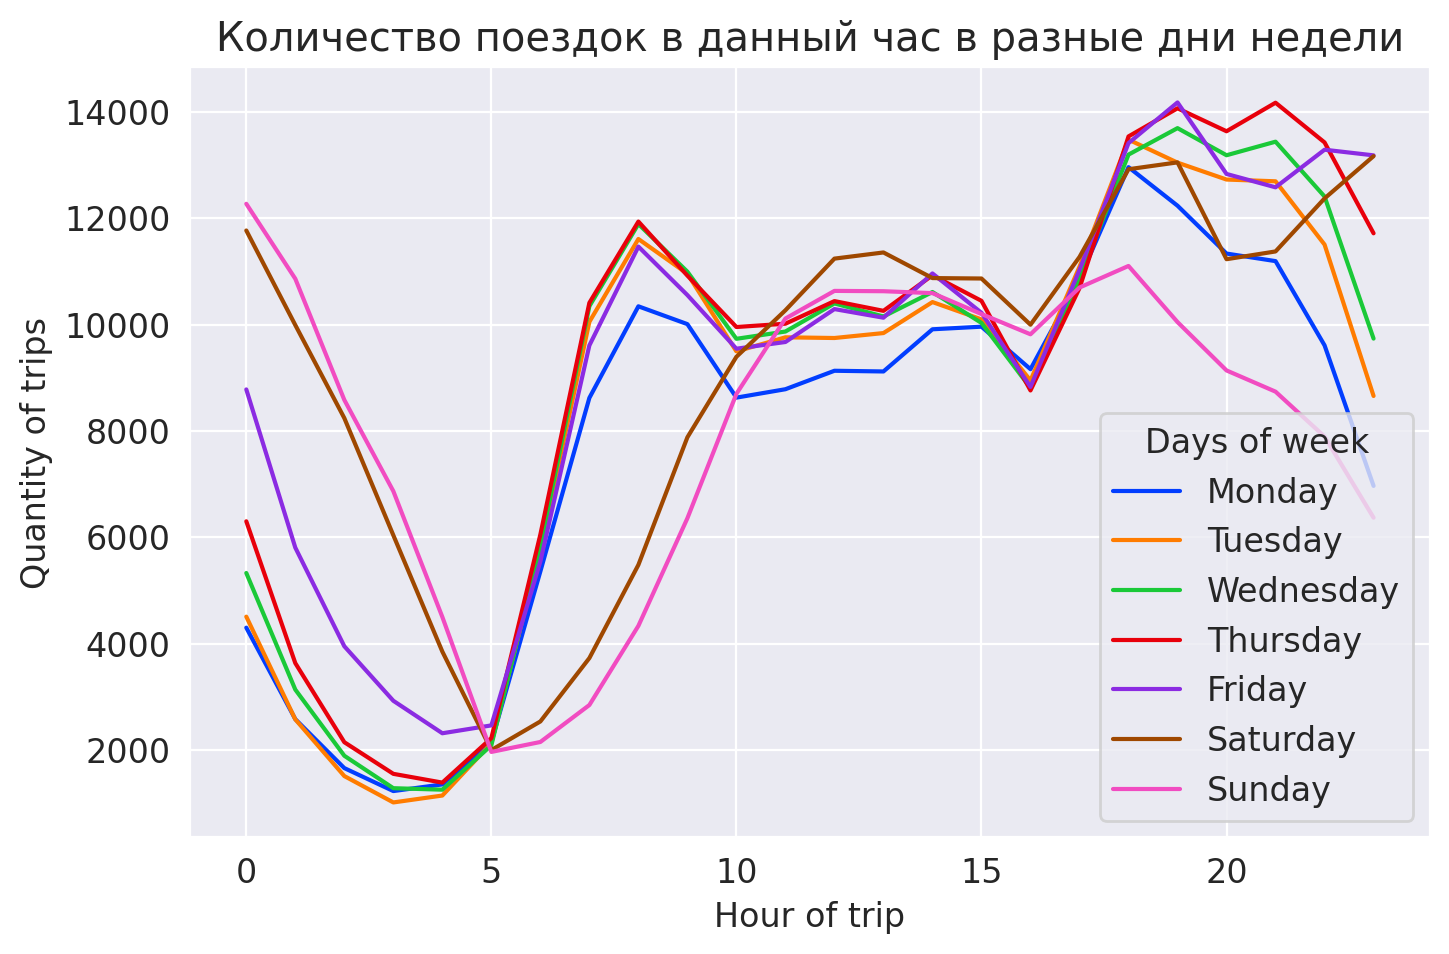

In [ ]:
common_hours_and_week = df.groupby(['day_of_week', 'hour_of_trip'], as_index = False)['id'].count()
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
common_hours_and_week['day_of_week'] = common_hours_and_week['day_of_week'].astype(str)
for i in range(0,7):
    week_ind = i
    week_ind = str(week_ind)
    common_hours_and_week.loc[(common_hours_and_week['day_of_week'] == week_ind), 'day_of_week'] = weeks[i]
fig, ax = plt.subplots()
sns.lineplot(x = 'hour_of_trip', y = 'id', hue = 'day_of_week', data = common_hours_and_week, ax = ax, palette = 'bright')
ax.legend(title = 'Days of week', loc = 'lower right')
ax.set_xlabel('Hour of trip')
ax.set_ylabel('Quantity of trips')
ax.set_title('Количество поездок в данный час в разные дни недели')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


Если посмотреть на график поездок в зависимости от часа по разным месяцам, то мы можем увидеть, что в 5 часов утра у нас наиболее низкое количество поездок в каждом месяце. В 18-19 часов наиболее высокое количество поездок. Это связано с тем, что в 5 утра скорее всего все уже вернулись домой или в нужное место и никому пока не нужно выходить куда-либо (работа начинается в 8 утра и обычно на нее люди выезжают в 7). При этом, вечером, в 18-19 часов все начинают возвращаться с работы, а потому количество поездок максимально. Если смотреть на график в целом, то все месяца довольно схожи по поездкам в разные часы. Единственное - в середине суток начинаются расхождения. Скорее всего, это связано с наличием определенных сезонных работ, на которые люди начинают ездить ближе к лету, и зимой не ездят, а потому количество поездок падает. (Т.е. ближе к утру или к вечеру никто не ездит на такие работы, а при этом, днем перестают и количество поездок ближе к зимним периодам снижается)

Что касается дней недели, то довольно выделяются в ночное время суток (с 0 до 5 утра) суббота и воскресенье. Дело в том, что в субботу ночью все скорее всего либо уезжают на вечеринки, либо куда-то улетают на выходные, а потому всем резко необходимо такси именно ночью. В воскресенье ночью тоже, скорее всего, все могут ехать на вечеринки или же возвращаться с них. При этом, можно заметить, что в воскресенье, начиная с 17 часов меньше поездок на такси, чем во все остальные дни. Это связано с тем, что скорее всего, многие уже сидят дома и никуда не выезжают, поскольку завтра у них начинается новая рабочая неделя. Все остальные месяцы довольно схожи друг с другом.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

Text(0.5, 1.0, 'Зависимость среднего логарифма времени поездки от дня недели')

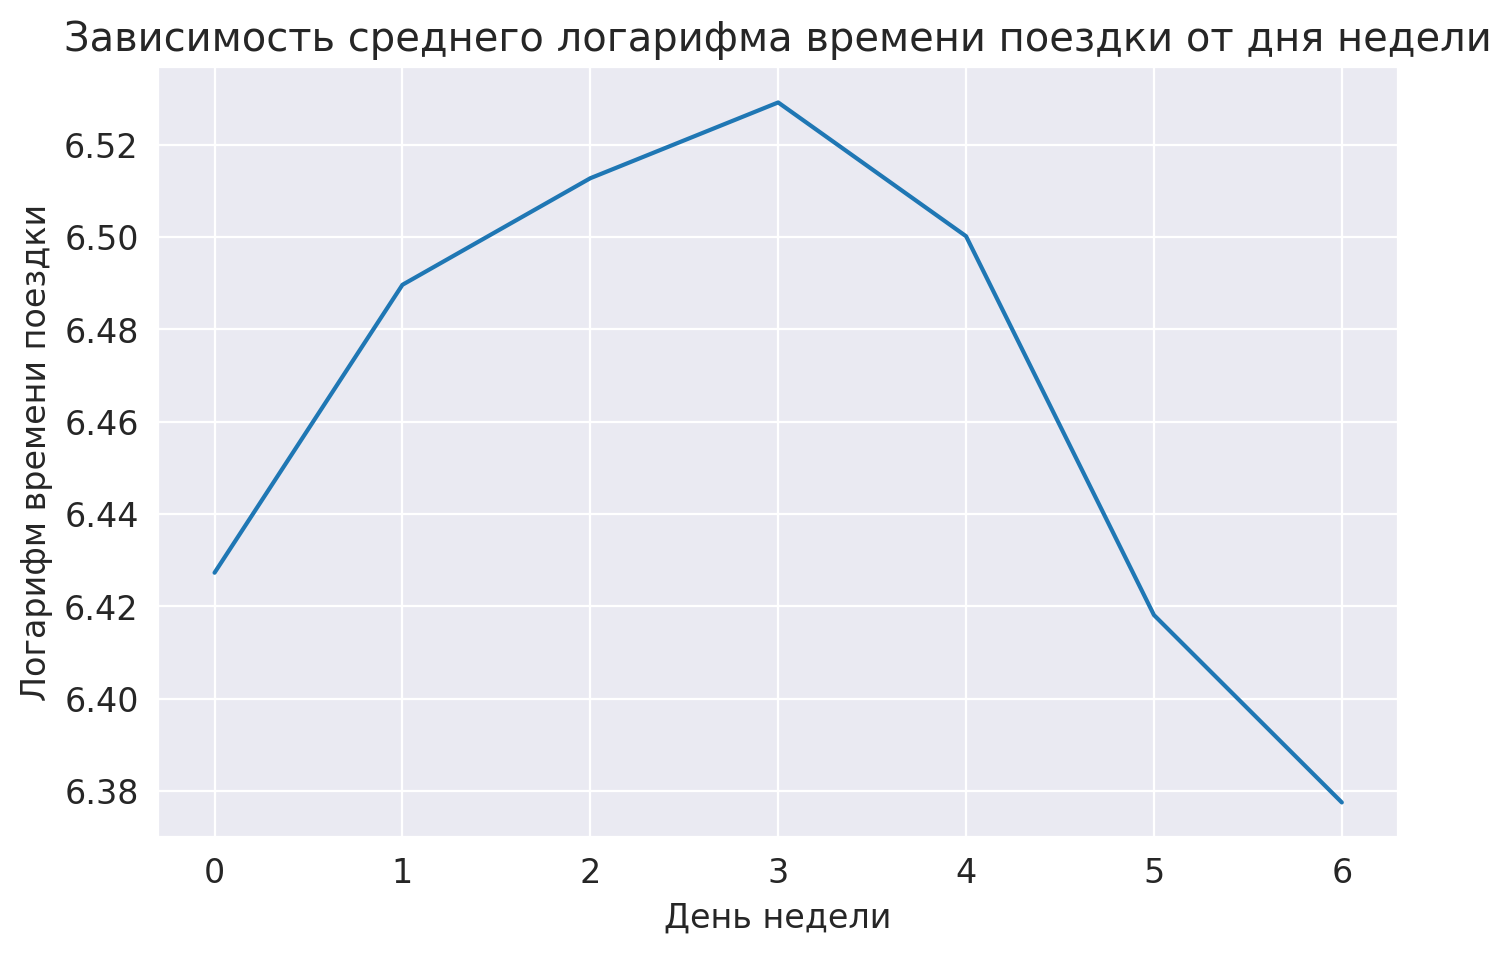

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
y = df['log_trip_duration']
df.drop(columns = ['id', 'hour_of_trip', 'day_of_trip', 'day_of_week', 'month_of_trip'], inplace = True)
x = df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
x_train['day_of_week'] = x_train['pickup_datetime'].dt.dayofweek
mean_value_day = x_train.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()
fig, ax = plt.subplots()
sns.lineplot(x = 'day_of_week', y = 'log_trip_duration', data = mean_value_day, ax = ax)
ax.set_xlabel('День недели')
ax.set_ylabel('Логарифм времени поездки')
ax.set_title('Зависимость среднего логарифма времени поездки от дня недели')

Text(0.5, 1.0, 'Зависимость среднего логарифма времени поездки от дня в году')

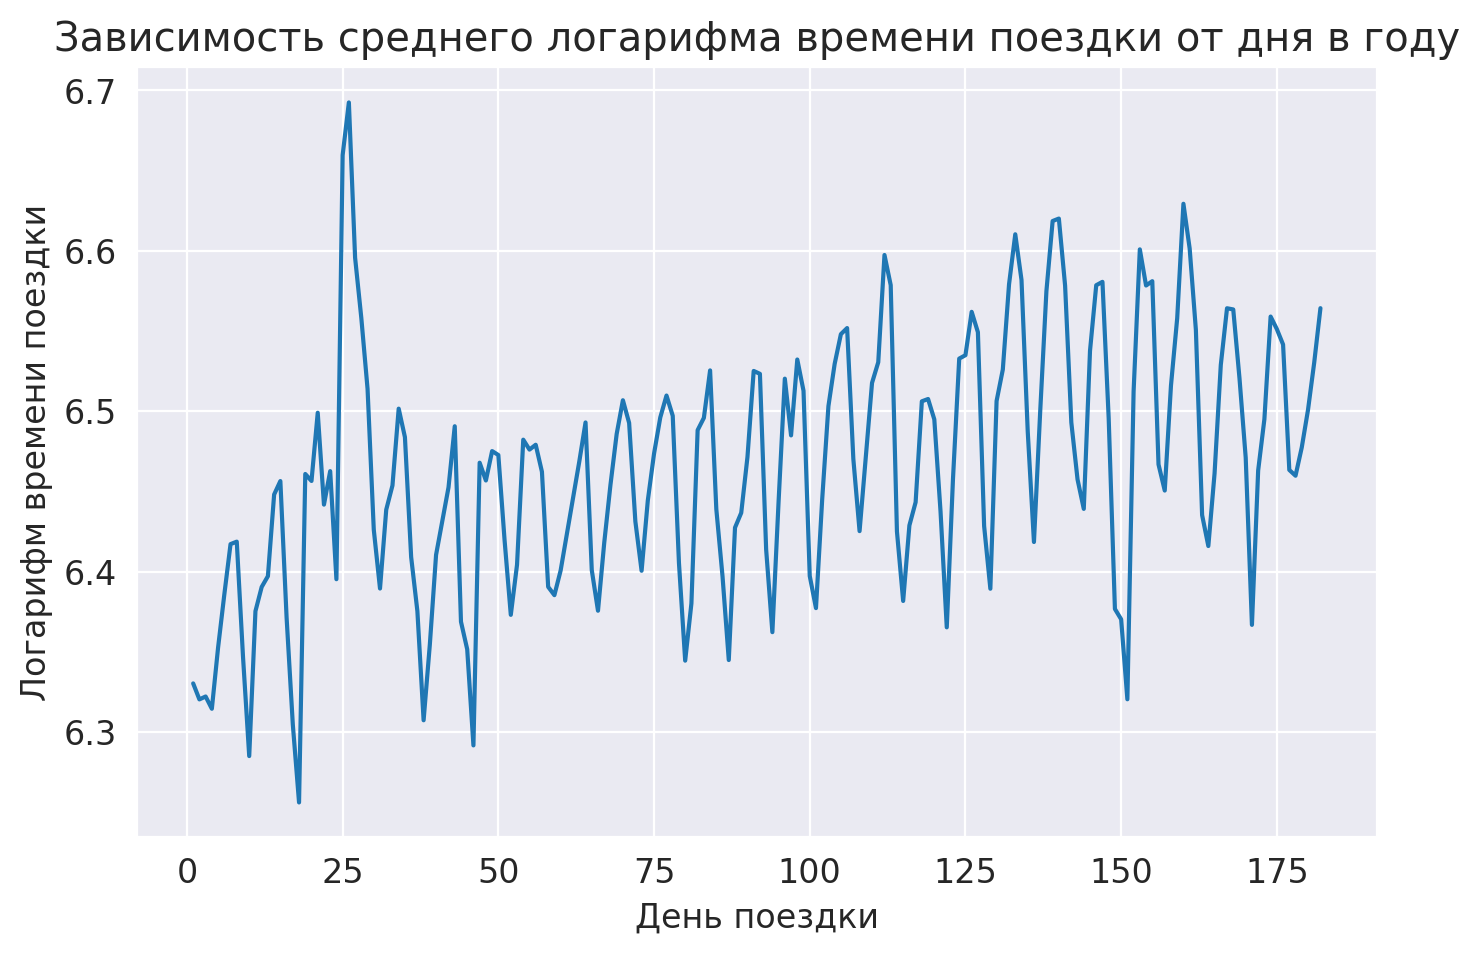

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['day_of_trip'] = x_train['pickup_datetime'].dt.dayofyear
mean_value_day = x_train.groupby('day_of_trip', as_index=False)['log_trip_duration'].mean()
fig, ax = plt.subplots()
sns.lineplot(x = 'day_of_trip', y = 'log_trip_duration', data = mean_value_day, ax = ax)
ax.set_xlabel('День поездки')
ax.set_ylabel('Логарифм времени поездки')
ax.set_title('Зависимость среднего логарифма времени поездки от дня в году')

Text(0.5, 1.0, 'Зависимость среднего логарифма времени поездки от часа суток')

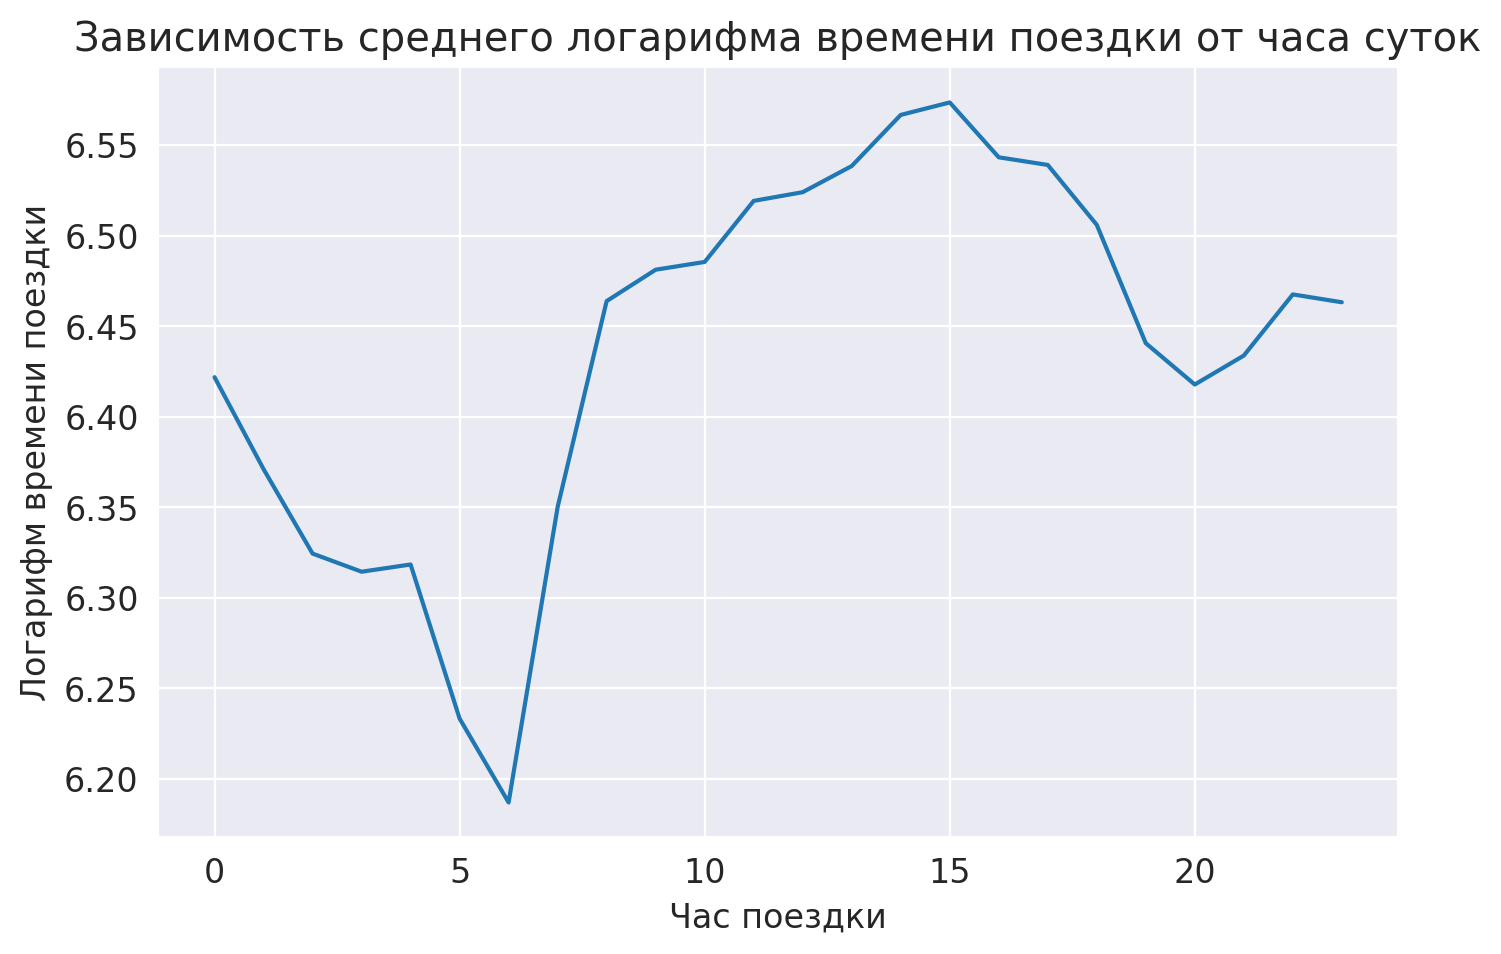

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train['hour_of_trip'] = x_train['pickup_datetime'].dt.hour
mean_value_day = x_train.groupby('hour_of_trip', as_index=False)['log_trip_duration'].mean()
fig, ax = plt.subplots()
sns.lineplot(x = 'hour_of_trip', y = 'log_trip_duration', data = mean_value_day, ax = ax)
ax.set_xlabel('Час поездки')
ax.set_ylabel('Логарифм времени поездки')
ax.set_title('Зависимость среднего логарифма времени поездки от часа суток')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Да, графики похожи, что логично, поскольку чем больше у нас поездок совершается - тем больше должно быть затрачено и время на поездку из-за пробок. Только пики достигаются в разные часы и дни недели - это может быть так из-за других факторов.

В первый аномальный период время поездки увеличилось, поскольку усложнились дорожные условия, а соответственно, из-за того, что нужно было безопасно ездить, средняя скорость снижалась и время увеличивалось. Во второй же аномальный период, наоборот, время снизилось, поскольку, скорее всего, раз многие люди решили не пользоваться такси из-за того, что не могли добраться на нем, дороги стали более свободными для тех людей, которые добирались в другие места и время поэтому уменьшилось.

На графике наблюдается положительный тренд роста логарифа времени поездки

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.drop(columns = ['day_of_trip', 'hour_of_trip', 'day_of_week'], inplace=True) #решил удалить колонки, чтобы соблюдался порядок добавления в соответствии с заданием
x_train['day_of_week'] = x_train['pickup_datetime'].dt.dayofweek
x_train['month_of_trip'] = x_train['pickup_datetime'].dt.month
x_train['hour_of_trip'] = x_train['pickup_datetime'].dt.hour
x_train['is_first_anomaly'] = 0
x_train['is_second_anomaly'] = 0
x_train['day_of_trip'] = x_train['pickup_datetime'].dt.dayofyear
x_train.loc[((x_train['day_of_trip'] == 23) | (x_train['day_of_trip'] == 24) | (x_train['day_of_trip'] == 25)), 'is_first_anomaly'] = 1
x_train.loc[((x_train['day_of_trip'] == 150) | (x_train['day_of_trip'] == 151)), 'is_second_anomaly'] = 2
x_train.loc[x_train['is_first_anomaly'] == 1]

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,day_of_week,month_of_trip,hour_of_trip,is_first_anomaly,is_second_anomaly,day_of_trip
846399,2,2016-01-23 00:15:42,6,-73.980354,40.744301,-73.987679,40.732845,N,6.124683,5,1,0,1,0,23
757433,2,2016-01-25 17:34:06,2,-73.790237,40.643829,-73.953773,40.732422,N,7.974877,0,1,17,1,0,25
925031,1,2016-01-24 14:08:24,1,-73.982224,40.778652,-73.999741,40.761684,N,6.507278,6,1,14,1,0,24
834450,2,2016-01-24 14:06:12,1,-73.985748,40.762909,-73.990021,40.767029,N,5.389072,6,1,14,1,0,24
1402051,1,2016-01-25 20:16:22,1,-73.975105,40.760963,-74.009598,40.704803,N,7.387090,0,1,20,1,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348298,2,2016-01-25 14:23:17,2,-73.986412,40.777512,-73.961502,40.770161,N,6.924612,0,1,14,1,0,25
204112,1,2016-01-24 17:17:40,2,-73.984779,40.753609,-73.991180,40.739185,N,7.285507,6,1,17,1,0,24
1173241,2,2016-01-24 19:09:37,2,-73.998680,40.719692,-73.978790,40.762291,N,7.029088,6,1,19,1,0,24
935110,1,2016-01-25 18:53:59,1,-73.957825,40.765373,-73.940025,40.806328,N,6.823286,0,1,18,1,0,25


In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_test['day_of_week'] = x_test['pickup_datetime'].dt.dayofweek
x_test['month_of_trip'] = x_test['pickup_datetime'].dt.month
x_test['hour_of_trip'] = x_test['pickup_datetime'].dt.hour
x_test['is_first_anomaly'] = 0
x_test['is_second_anomaly'] = 0
x_test['day_of_trip'] = x_test['pickup_datetime'].dt.dayofyear
x_test.loc[((x_test['day_of_trip'] == 23) | (x_test['day_of_trip'] == 24) | (x_test['day_of_trip'] == 25)), 'is_first_anomaly'] = 1
x_test.loc[((x_test['day_of_trip'] == 150) | (x_test['day_of_trip'] == 151)), 'is_second_anomaly'] = 2
x_test.head()
x_train.dtypes

,0
vendor_id,int64
pickup_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object
log_trip_duration,float64
day_of_week,int32


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Заметим, что все наши выделенные признаки на самом деле категориальные. Очевидно, что никакое из значений признаков нельзя складывать друг с другом. Также, могло показаться, что мы бы могли, например, день года сравнивать друг с другом, однако в нашем случае порядок дней не имеет никакого смысла, поскольку скорее всего нет никакой зависимости количества поездок от начала года и модель будет пытаться вывести ложные закономерности, которых нет. Возможно, модель расклассифицирует данные по месяцам и уже будет строить прогнозы на основе этого, однако если сравнивать дни попарно - то их порядок ничего не даст.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x_train_1 = x_train[['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly']]

categorical = list(x_train_1.columns)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(x_train_1, y_train)
y_pred = model.predict(x_test[['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly']])
error = rmsle(y_test, y_pred)
print("Test RMSLE =", error)

Test RMSLE = 0.7864745467973021


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, поскольку иначе функция будет работать очень долго

In [ ]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функцию, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
your_lat_values = df.loc[3000:3999,'pickup_latitude']
your_lon_values = df.loc[3000:3999,'pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Заметим, что есть скопления точек около аэропортов Джона Кеннеди и Ля Гуардия. Они могут быть полезны для нашей задачи, поскольку модель будет понимать, что люди ездят не только в Манхэттэне, но и из других мест, которые тоже составляют скорее всего большую часть выборки. А значит, на тесте модель уже будет хорошо предсказывать время поездки, поскольку будет знать, что люди могут начинать поездки в разных точках. То есть, я выбрал эти точки, поскольку их тоже довольно много и это поможет модели лучше обучиться для предсказывания на всем многообразии данных.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
x_train.loc[:, 'distance_haversine'] = haversine_array(x_train['pickup_latitude'].values, x_train['pickup_longitude'].values, x_train['dropoff_latitude'].values, x_train['dropoff_longitude'].values)
x_test.loc[:, 'distance_haversine'] = haversine_array(x_test['pickup_latitude'].values, x_test['pickup_longitude'].values, x_test['dropoff_latitude'].values, x_test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.loc[:, 'log_haversine'] = np.log1p(x_train.loc[:, 'distance_haversine'])
x_test.loc[:, 'log_haversine'] = np.log1p(x_test.loc[:, 'distance_haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Корреляция таргета с расстоянием без логарифма на обучающей выборке: ', x_train['distance_haversine'].corr(y_train))
print('Корреляция таргета с расстоянием c логарифмом на обучающей выборке: ', x_train['log_haversine'].corr(y_train))

Корреляция таргета с расстоянием без логарифма на обучающей выборке:  0.5655123462943574
Корреляция таргета с расстоянием c логарифмом на обучающей выборке:  0.7498153903900349


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<Axes: xlabel='av_speed', ylabel='Count'>

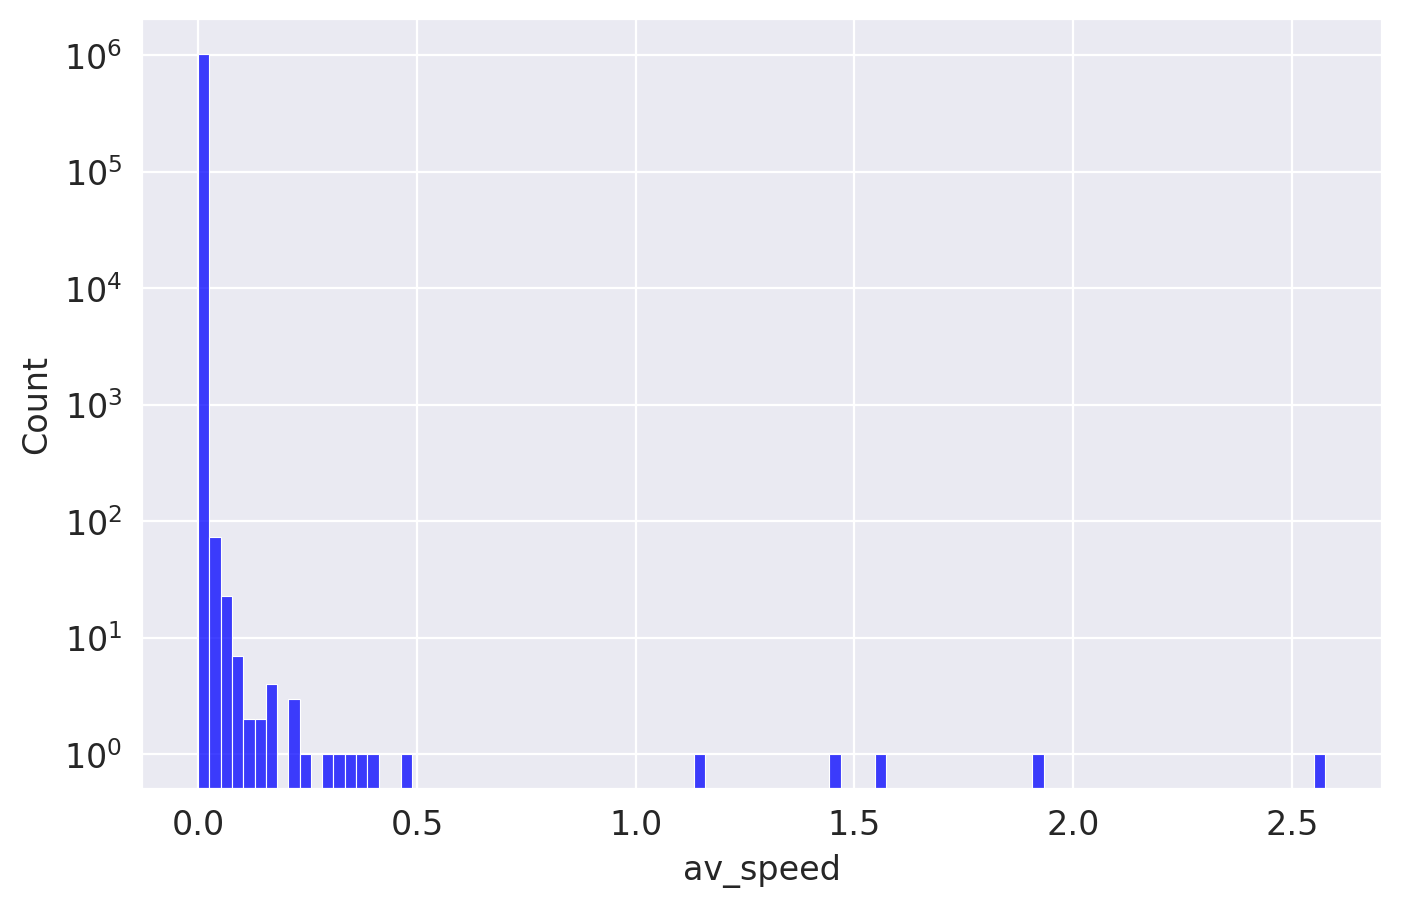

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.loc[:,'av_speed'] = x_train.loc[:,'distance_haversine']/(np.exp(x_train.loc[:, 'log_trip_duration']) - 1)
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.histplot(x_train.loc[:,'av_speed'], bins = 100, color = 'blue', ax = ax)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: xlabel='av_speed', ylabel='Count'>

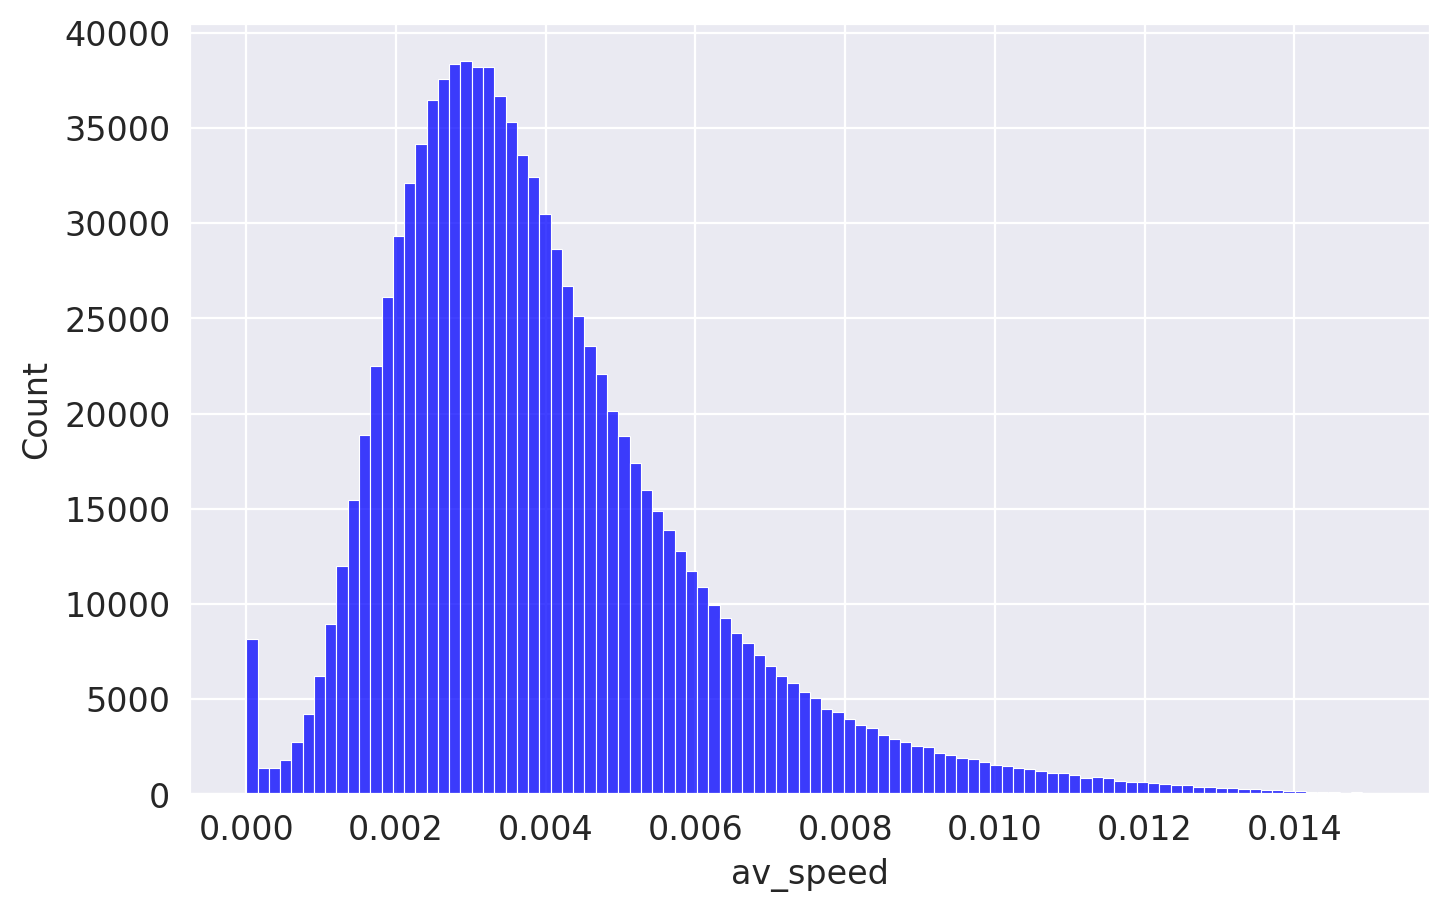

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots()
mask = x_train.loc[:, 'av_speed'] < np.quantile(x_train.loc[:, 'av_speed'], 0.999)
sns.histplot(x_train[mask]['av_speed'], bins = 100, color = 'blue', ax = ax)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

Text(91.72222222222221, 0.5, 'День недели')

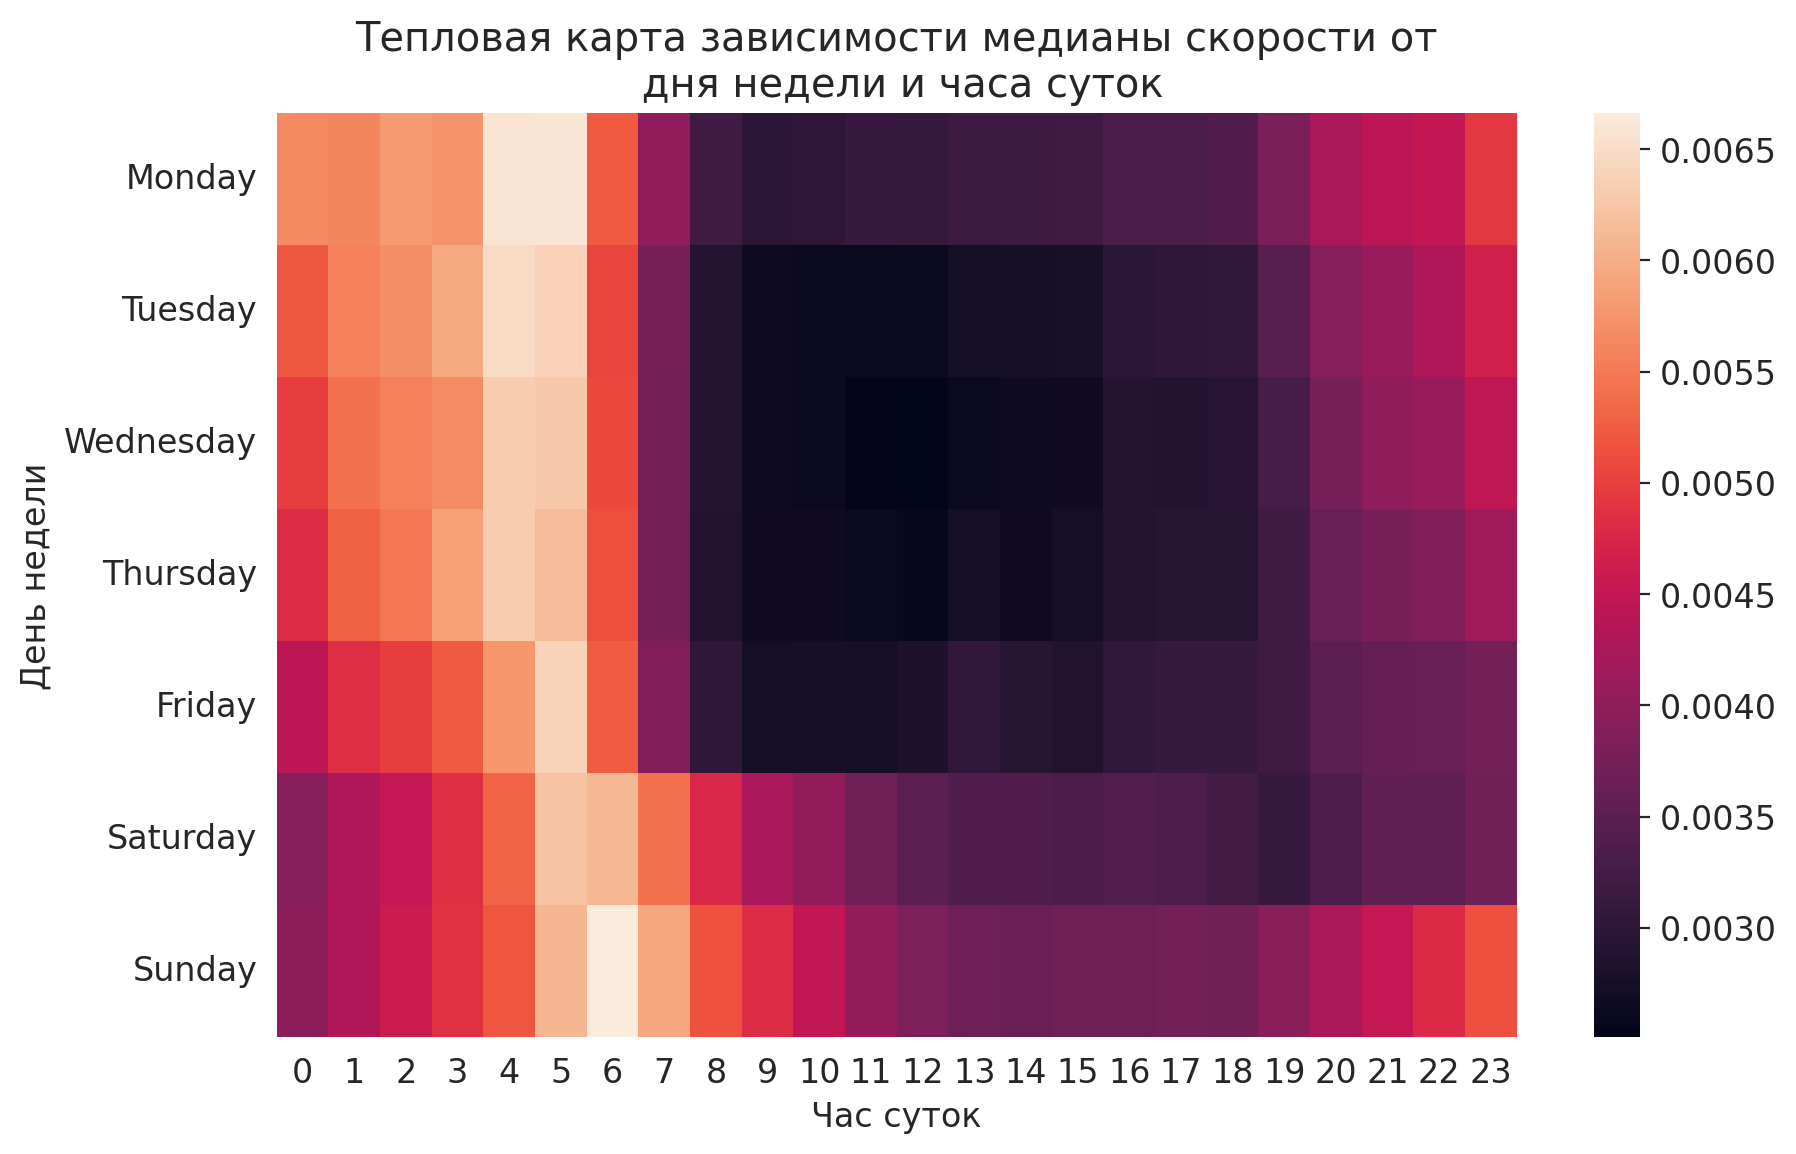

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
common_hours_and_week = x_train.groupby(['day_of_week', 'hour_of_trip'], as_index = False)['av_speed'].median()
data = pd.pivot_table(data=common_hours_and_week, index='day_of_week', columns='hour_of_trip', values='av_speed')
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(data,
                 ax=ax,
                 yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

ax.set_title('Тепловая карта зависимости медианы скорости от\n дня недели и часа суток')
ax.set_xlabel('Час суток')
ax.set_ylabel('День недели')

Не забудьте удалить колонку со значением скорости из данных!


In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.drop('av_speed', axis = 1, inplace = True)


**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Значения скорости нельзя использовать во время обучения, поскольку у нас уже есть колонка с расстоянием. Тогда наша модель, зная скорость и расстояние, всегда сможет вычислить время. Произойдет target leak - то есть информация о нашей целевой переменной уже косвенно содержится в признаках, поскольку скорость мы рассчитывали зная расстояние и значение целевой переменной. Тогда мы получим модель, которая очень хорошо работает, но только потому, что признаки дали ей возможность знать целевую переменную.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.


Судя по графику, самая высокая медиана наблюдалась с 4-х до 5 утра с понедельника по четверг, в 5 утра в пятницу, и с 5 до 6 утра в субботу и воскресенье. Если применить функцию annot и довольно сильно растянуть график в ширину, то получим, что абсолютный максимум медианы достигается в воскресенье в 10 утра. Минимальная медиана наблюдалась со вторника по пятницу, с 10 до 12. При этом, с помощью функции annot можно выяснить, что наиболее низкая была в среду в 11 и 12 часов.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Под категорию поездок, совершаемых в период пробок, по моему мнению, попадют поездки, совершаемые со вторника по пятницу, с 9 утра до 3 часов дня, что в целом, довольно логично, поскольку в это время у людей активное рабочее время.

Под категорию поездок, совершаемых в период без пробок я включил с понедельника по четверг с 4-х до 5 утра, в пятницу в 5 утра, и в субботу и воскресенье с 5 до 6 утра.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.loc[:,'probka_road'] = 0
x_train.loc[(((x_train.loc[:,'day_of_week'] == 1) |
 (x_train.loc[:,'day_of_week'] == 2) |
  (x_train.loc[:,'day_of_week'] == 3) |
   (x_train.loc[:,'day_of_week'] == 4)) &
 ((x_train.loc[:, 'hour_of_trip'] == 9) |
  (x_train.loc[:, 'hour_of_trip'] == 10) |
   (x_train.loc[:, 'hour_of_trip'] == 11) |
    (x_train.loc[:, 'hour_of_trip'] == 12) |
     (x_train.loc[:, 'hour_of_trip'] == 13) |
      (x_train.loc[:, 'hour_of_trip'] == 14) |
       (x_train.loc[:, 'hour_of_trip'] == 14))), 'probka_road'] = 1
x_train.loc[:,'clear_road'] = 0
x_train.loc[((((x_train.loc[:,'day_of_week'] == 0) |
 (x_train.loc[:,'day_of_week'] == 1) |
  (x_train.loc[:,'day_of_week'] == 2) |
   (x_train.loc[:,'day_of_week'] == 3)) &
 ((x_train.loc[:, 'hour_of_trip'] == 4) |
  (x_train.loc[:, 'hour_of_trip'] == 5))) | ((x_train.loc[:,'day_of_week'] == 4) & (x_train.loc[:, 'hour_of_trip'] == 5)) |
            (((x_train.loc[:,'day_of_week'] == 5) | (x_train.loc[:,'day_of_week'] == 6)) &  ((x_train.loc[:, 'hour_of_trip'] == 5) |
  (x_train.loc[:, 'hour_of_trip'] == 6)))), 'clear_road'] = 1

In [ ]:
x_test.loc[:,'probka_road'] = 0
x_test.loc[(((x_test.loc[:,'day_of_week'] == 1) |
 (x_test.loc[:,'day_of_week'] == 2) |
  (x_test.loc[:,'day_of_week'] == 3) |
   (x_test.loc[:,'day_of_week'] == 4)) &
 ((x_test.loc[:, 'hour_of_trip'] == 9) |
  (x_test.loc[:, 'hour_of_trip'] == 10) |
   (x_test.loc[:, 'hour_of_trip'] == 11) |
    (x_test.loc[:, 'hour_of_trip'] == 12) |
     (x_test.loc[:, 'hour_of_trip'] == 13) |
      (x_test.loc[:, 'hour_of_trip'] == 14) |
       (x_test.loc[:, 'hour_of_trip'] == 14))), 'probka_road'] = 1
x_test.loc[:,'clear_road'] = 0
x_test.loc[((((x_test.loc[:,'day_of_week'] == 0) |
 (x_test.loc[:,'day_of_week'] == 1) |
  (x_test.loc[:,'day_of_week'] == 2) |
   (x_test.loc[:,'day_of_week'] == 3)) &
 ((x_test.loc[:, 'hour_of_trip'] == 4) |
  (x_test.loc[:, 'hour_of_trip'] == 5))) | ((x_test.loc[:,'day_of_week'] == 4) & (x_test.loc[:, 'hour_of_trip'] == 5)) |
            (((x_test.loc[:,'day_of_week'] == 5) | (x_test.loc[:,'day_of_week'] == 6)) &  ((x_test.loc[:, 'hour_of_trip'] == 5) |
  (x_test.loc[:, 'hour_of_trip'] == 6)))), 'clear_road'] = 1


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Добавление данных признаков в модель поможет нашей модели отделять поездки из аэропорта Кеннеди или аэропорта Лягуардии от всех остальных скоплений поездок, что поможет модели выявить отдельные закономерности именно для аэропортов, а соответственно лучше предсказывать длительность поездки в зависимости от координат начала или конца поездки.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#аэропорт ЛяГуардия
left_low_lat_laguard = 40.766918
left_low_lon_laguard = -73.889273
right_up_lat_laguard = 40.781115
right_up_lon_laguard = -73.854296

#аэропорт Кеннеди
left_low_lat_kennedy = 40.621434
left_low_lon_kennedy = -73.823541
right_up_lat_kennedy = 40.663717
right_up_lon_kennedy = -73.747778

x_train['is_LaGuardia_airport_pick'] = 0
x_train.loc[((x_train['pickup_latitude'] >= left_low_lat_laguard) & (x_train['pickup_latitude'] <= right_up_lat_laguard) &
            (x_train['pickup_longitude'] >= left_low_lon_laguard) & (x_train['pickup_longitude'] <= right_up_lon_laguard)), 'is_LaGuardia_airport_pick'] = 1

x_train['is_LaGuardia_airport_drop'] = 0
x_train.loc[((x_train['dropoff_latitude'] >= left_low_lat_laguard) & (x_train['dropoff_latitude'] <= right_up_lat_laguard) &
            (x_train['dropoff_longitude'] >= left_low_lon_laguard) & (x_train['dropoff_longitude'] <= right_up_lon_laguard)), 'is_LaGuardia_airport_drop'] = 1

x_train['is_Kennedy_airport_pick'] = 0
x_train.loc[((x_train['pickup_latitude'] >= left_low_lat_kennedy) & (x_train['pickup_latitude'] <= right_up_lat_kennedy) &
            (x_train['pickup_longitude'] >= left_low_lon_kennedy) & (x_train['pickup_longitude'] <= right_up_lon_kennedy)), 'is_Kennedy_airport_pick'] = 1

x_train['is_Kennedy_airport_drop'] = 0
x_train.loc[((x_train['dropoff_latitude'] >= left_low_lat_kennedy) & (x_train['dropoff_latitude'] <= right_up_lat_kennedy) &
            (x_train['dropoff_longitude'] >= left_low_lon_kennedy) & (x_train['dropoff_longitude'] <= right_up_lon_kennedy)), 'is_Kennedy_airport_drop'] = 1

In [ ]:
x_test['is_LaGuardia_airport_pick'] = 0
x_test.loc[((x_test['pickup_latitude'] >= left_low_lat_laguard) & (x_test['pickup_latitude'] <= right_up_lat_laguard) &
            (x_test['pickup_longitude'] >= left_low_lon_laguard) & (x_test['pickup_longitude'] <= right_up_lon_laguard)), 'is_LaGuardia_airport_pick'] = 1


x_test['is_LaGuardia_airport_drop'] = 0
x_test.loc[((x_test['dropoff_latitude'] >= left_low_lat_laguard) & (x_test['dropoff_latitude'] <= right_up_lat_laguard) &
            (x_test['dropoff_longitude'] >= left_low_lon_laguard) & (x_test['dropoff_longitude'] <= right_up_lon_laguard)), 'is_LaGuardia_airport_drop'] = 1


x_test['is_Kennedy_airport_pick'] = 0
x_test.loc[((x_test['pickup_latitude'] >= left_low_lat_kennedy) & (x_test['pickup_latitude'] <= right_up_lat_kennedy) &
            (x_test['pickup_longitude'] >= left_low_lon_kennedy) & (x_test['pickup_longitude'] <= right_up_lon_kennedy)), 'is_Kennedy_airport_pick'] = 1


x_test['is_Kennedy_airport_drop'] = 0
x_test.loc[((x_test['dropoff_latitude'] >= left_low_lat_kennedy) & (x_test['dropoff_latitude'] <= right_up_lat_kennedy) &
            (x_test['dropoff_longitude'] >= left_low_lon_kennedy) & (x_test['dropoff_longitude'] <= right_up_lon_kennedy)), 'is_Kennedy_airport_drop'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

<Axes: title={'center': '\nЯщик с усами распределения логарифма времени для\n is_Kennedy_airport_drop'}, xlabel='Значение признака для dropoff', ylabel='log_trip_duration'>

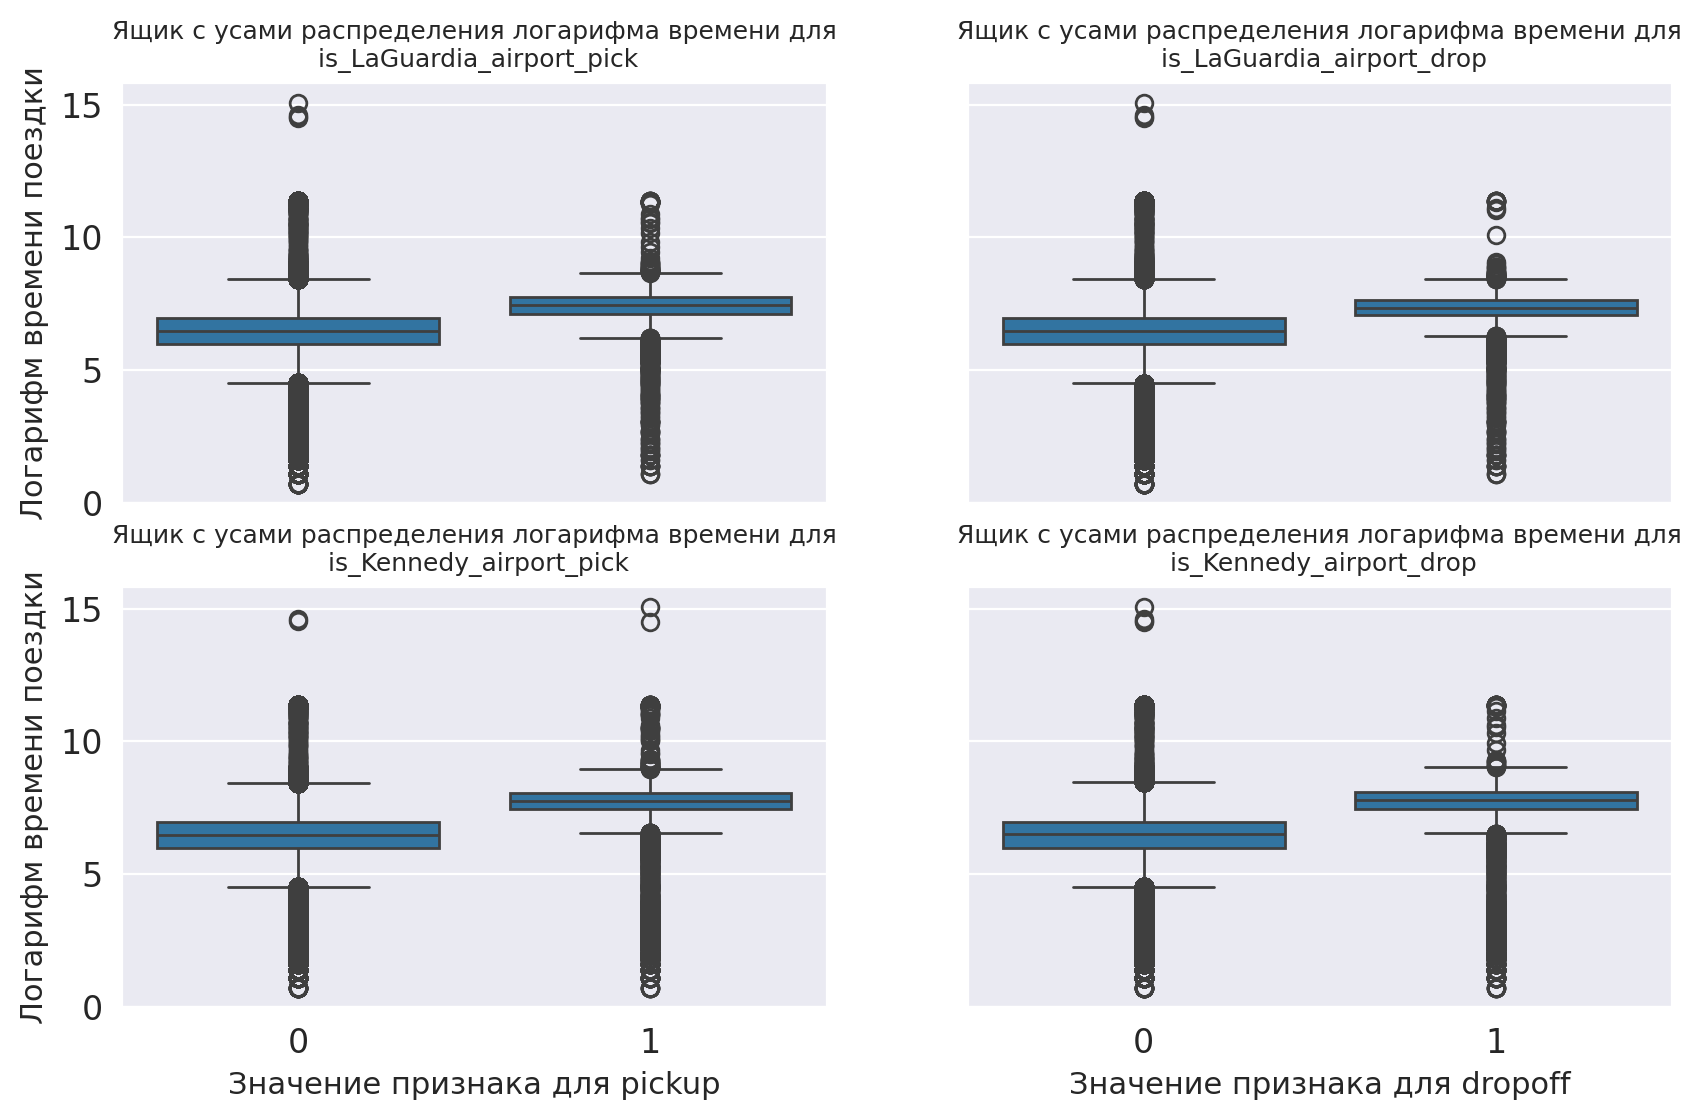

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize = (10, 6))
ax[0, 0].set_title('Ящик с усами распределения логарифма времени для\n is_LaGuardia_airport_pick', fontsize=9)
ax[0, 1].set_title('Ящик с усами распределения логарифма времени для\n is_LaGuardia_airport_drop', fontsize=9)
ax[1, 0].set_title('\nЯщик с усами распределения логарифма времени для\n is_Kennedy_airport_pick', fontsize=9)
ax[1, 1].set_title('\nЯщик с усами распределения логарифма времени для\n is_Kennedy_airport_drop', fontsize=9)
ax[1, 0].set_xlabel('Значение признака для pickup', fontsize=11)
ax[1, 1].set_xlabel('Значение признака для dropoff', fontsize=11)
ax[0, 0].set_ylabel('Логарифм времени поездки', fontsize=11)
ax[1, 0].set_ylabel('Логарифм времени поездки', fontsize=11)
sns.boxplot(x = 'is_LaGuardia_airport_pick', y = 'log_trip_duration', data = x_train, ax = ax[0,0])
sns.boxplot(x = 'is_LaGuardia_airport_drop', y = 'log_trip_duration', data = x_train, ax = ax[0,1])
sns.boxplot(x = 'is_Kennedy_airport_pick', y = 'log_trip_duration', data = x_train, ax = ax[1,0])
sns.boxplot(x = 'is_Kennedy_airport_drop', y = 'log_trip_duration', data = x_train, ax = ax[1,1])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Судя по графикам, признаки получились хорошими, поскольку мы видим, что везде, где мы поставили 1, логарифм времени поездки был больше, чем там, где мы поставили 0. Т.е. те люди, которые ехали в аэропорт или уезжали из него в среднем ездили дольше на такси, чем люди, совершавшие другие поездки, что довольно логично, поскольку обычно у аэропорта никто не живет.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
'''
Код был написан с помощью ChatGPT, однако я его полностью понял, доработал и написал свои комментарии, чтобы показать понимание.
Промпты для выполнения задания были следующие:

-Сначала я передал полностью задание, сказав, что ChatGPT гениально владеет ООП на питоне,
что он хорошо знает все библиотеки питона, которые требуются в машинном обучении.

-Затем передал код, который был подготовлен для данного задания (это все в одном запросе) и сказал, что ему нужно дополнить этот код всем
необходимым, чтобы выполнить задание.

-В коде я переименовал некоторые переменные, чтобы он правильно работал, и сразу внес граничиные координаты, которые создают прямоугольник
вокруг Манхэттана.
'''

from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently


class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=10, n_cols=10): #сначала прописали атрибуты объекта класса
        self.n_rows = n_rows  # Количество строк
        self.n_cols = n_cols  # Количество столбцов
        self.cell_width = None  # Ширина ячейки
        self.cell_height = None  # Высота ячейки
        self.min_lat = 40.700678  # Минимальная широта
        self.max_lat = 40.803944  # Максимальная широта
        self.min_lon = -74.021558  # Минимальная долгота
        self.max_lon = -73.927812  # Максимальная долгота

    def show_map(self):
        # Визуализация ячеек (можно использовать matplotlib для графиков)
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 10))

        for i in range(self.n_rows):
            for j in range(self.n_cols):
                rect = plt.Rectangle((self.min_lon + j * self.cell_width,  #задали левую границу мини-брусочка, на которые разбился у нас весь большой брусок, который мы ограничили широтами и долготами
                                      self.max_lat - (i + 1) * self.cell_height), #задали низ этого мини-брусочка
                                     self.cell_width, #задали ширину
                                     self.cell_height, #задли длину брусочка
                                     fill=None,
                                     edgecolor='blue')
                plt.gca().add_patch(rect) #отображаем его просто на том же графике

        plt.xlim(self.min_lon, self.max_lon)
        plt.ylim(self.min_lat, self.max_lat)
        plt.title('Map Grid')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid()
        plt.show()

    def fit(self, X=None, y=None):

        self.cell_width = (self.max_lon - self.min_lon) / self.n_cols #здесь мы задаем ширину одного брусочка. Мы знаем разницу между максимальной и минимальной долготой.
                                                                      #Значит, мы можем поделить все на то количество частей, которое задали. Аналогично с широтой.
        self.cell_height = (self.max_lat - self.min_lat) / self.n_rows

        return self

    def transform(self, X, y=None):
        # Создаем копию DataFrame для трансформации
        X_transformed = X.copy() #копируем, поскольку иначе все изменяли бы в исходном x_train

        # Проверка на границы
        pickup_mask = (
            (X_transformed['pickup_latitude'] >= self.min_lat) & (X_transformed['pickup_latitude'] <= self.max_lat) &
            (X_transformed['pickup_longitude'] >= self.min_lon) & (X_transformed['pickup_longitude'] <= self.max_lon)
        )

        dropoff_mask = (
            (X_transformed['dropoff_latitude'] >= self.min_lat) & (X_transformed['dropoff_latitude'] <= self.max_lat) &
            (X_transformed['dropoff_longitude'] >= self.min_lon) & (X_transformed['dropoff_longitude'] <= self.max_lon)
        )

        # Вычисление номера ячейки для начальных координат
        start_row = ((self.max_lat - X_transformed['pickup_latitude']) // self.cell_height).astype(int) #здесь мы просто раскидываем теперь все наши точки начала поездок по ячейкам.
                                                                                                        #максимальная долгота находится в нулевой ячейке. Минимальная на границе последней.
        start_col = ((X_transformed['pickup_longitude'] - self.min_lon) // self.cell_width).astype(int)
        pickup_cell_numbers = start_row * self.n_cols + start_col #нумерация идет слева направо, сверху вниз, поэтому мы сначала домножением на количество
                                                                  #колонок определяем на какой строке мы находимся. А потом, прибавляя количество колонок для данного
                                                                  #числа уже определяем в какой колонке находимся. Поэтому каждая точка будет правильно пронумерована.
        pickup_cell_numbers[~pickup_mask] = -1  # Установка -1 для ячеек вне границ

        # Вычисление номера ячейки для конечных координат
        end_row = ((self.max_lat - X_transformed['dropoff_latitude']) // self.cell_height).astype(int)
        end_col = ((X_transformed['dropoff_longitude'] - self.min_lon) // self.cell_width).astype(int)
        dropoff_cell_numbers = end_row * self.n_cols + end_col
        dropoff_cell_numbers[~dropoff_mask] = -1  # Установка -1 для ячеек вне границ

        # Добавляем новые колонки в копию DataFrame
        X_transformed['pickup_cell'] = pickup_cell_numbers
        X_transformed['dropoff_cell'] = dropoff_cell_numbers

        return X_transformed

In [ ]:
grid_transformer = MapGridTransformer()
x_train_copy = grid_transformer.fit().transform(x_train)
x_test_copy = grid_transformer.fit().transform(x_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
x_train_copy_1 = x_train_copy[['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly', 'probka_road',
                               'clear_road', 'is_LaGuardia_airport_pick', 'is_LaGuardia_airport_drop', 'is_Kennedy_airport_pick',
                               'is_Kennedy_airport_drop', 'pickup_cell', 'dropoff_cell', 'log_haversine']]

x_test_copy_1 = x_test_copy[['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly', 'probka_road',
                               'clear_road', 'is_LaGuardia_airport_pick', 'is_LaGuardia_airport_drop', 'is_Kennedy_airport_pick',
                               'is_Kennedy_airport_drop', 'pickup_cell', 'dropoff_cell', 'log_haversine']]

categorical = ['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly', 'probka_road',
                               'clear_road', 'is_LaGuardia_airport_pick', 'is_LaGuardia_airport_drop', 'is_Kennedy_airport_pick',
                               'is_Kennedy_airport_drop', 'pickup_cell', 'dropoff_cell']

numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(x_train_copy_1, y_train)
y_pred = model.predict(x_test_copy_1)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))


Test RMSLE = 0.4691


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

-vendor_id: скорее всего, в Нью_Йорке могут быть компании такси, которые очень сильно специализированны на Манхэттэне, а потому, для этих компаний поездки будут в среднем короче. И модель будет это понимать. Также можно предположить, что у определенных компаний может не быть крупных машин, в которые можно погрузить большие чемоданы - и часть поездок в аэропорты тоже пропадут. Поэтому, для таких компаний поездки тоже будут в среднем короче. Также можно предположить, что у более крупных поставщиков услуг такси есть многочисленные партнерства с крупными компаниями, которые заказывают для своих работников эти такси этой компании. А многие крупные компании находятся, скорее всего, в Манхэттэне, а потому, для таких крупных поставщиков услуг такси поездки могут быть в среднем короче, так как заказы могут быть условно говоря съездить в соседний оффис.

-passenger_count - скорее всего, люди, которые едут большими компаниями едут в какое-то путешествие или на какое-то торжественное событие, поскольку они собрались все вместе, а потому их поездки будут в среднем длинее. Те, кто едут в одиночку или вдвоем скорее всего либо едут куда-то от компании, недалеко, либо на деловую встречу, что не требует преодоления больших расстояний.

store_and_fwd_flag - скорее всего, если результат N, то это может означать для некоторых случаев, что были определенные сбои с интернетом или с чем-то еще, что могло привести к сбоям с счетчиком. А потому поездки могли оказаться длиннее. Если же значение Y, то поездка проходила нормально и значит, никаких выбросов быть не могло.



Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
unique_val = []
unique_val.append(x_train['vendor_id'].nunique())
unique_val.append(x_train['passenger_count'].nunique())
unique_val.append(x_train['store_and_fwd_flag'].nunique())
print(*unique_val)

2 9 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0.5, 1.0, 'Ящик с усами распределения логарифма времени поездки\n в зависимости от значения vendor_id')

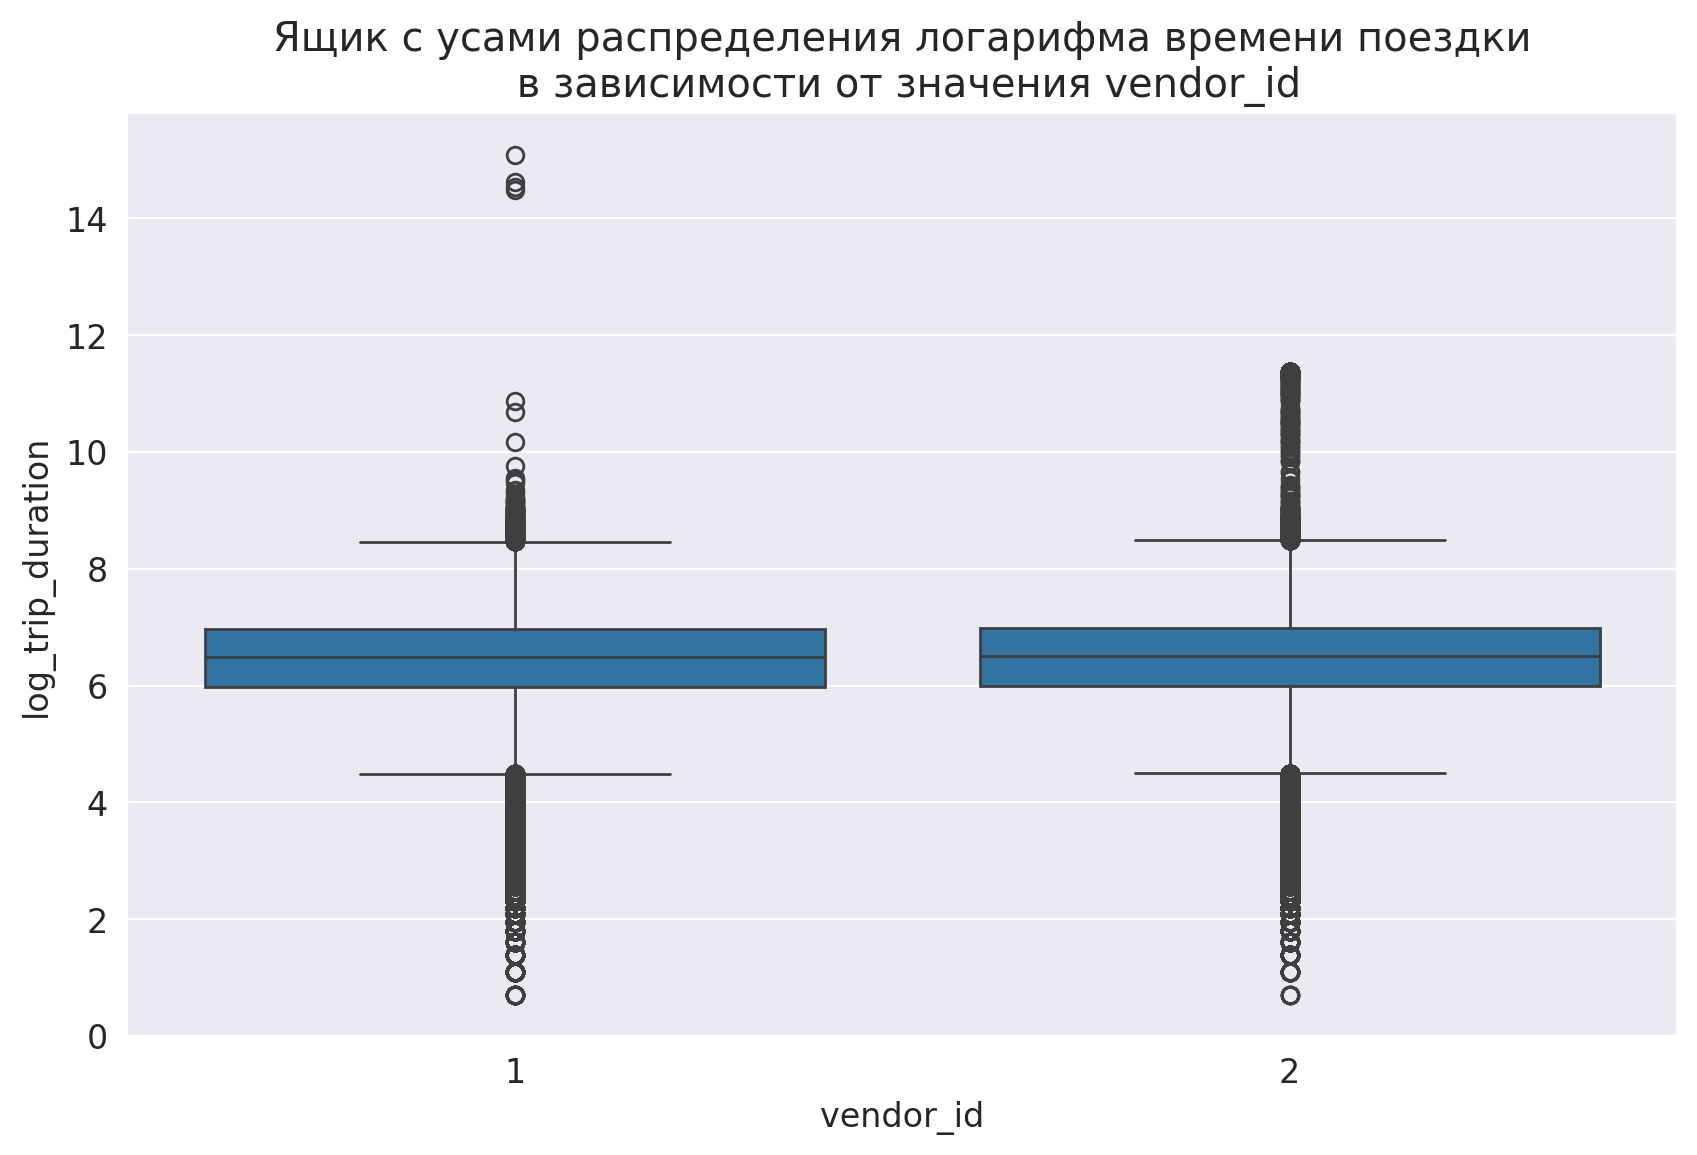

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'vendor_id', y = 'log_trip_duration', data = x_train)
ax.set_title('Ящик с усами распределения логарифма времени поездки\n в зависимости от значения vendor_id')

Text(0.5, 1.0, 'Ящик с усами распределения логарифма времени поездки\n в зависимости от значения passenger_count')

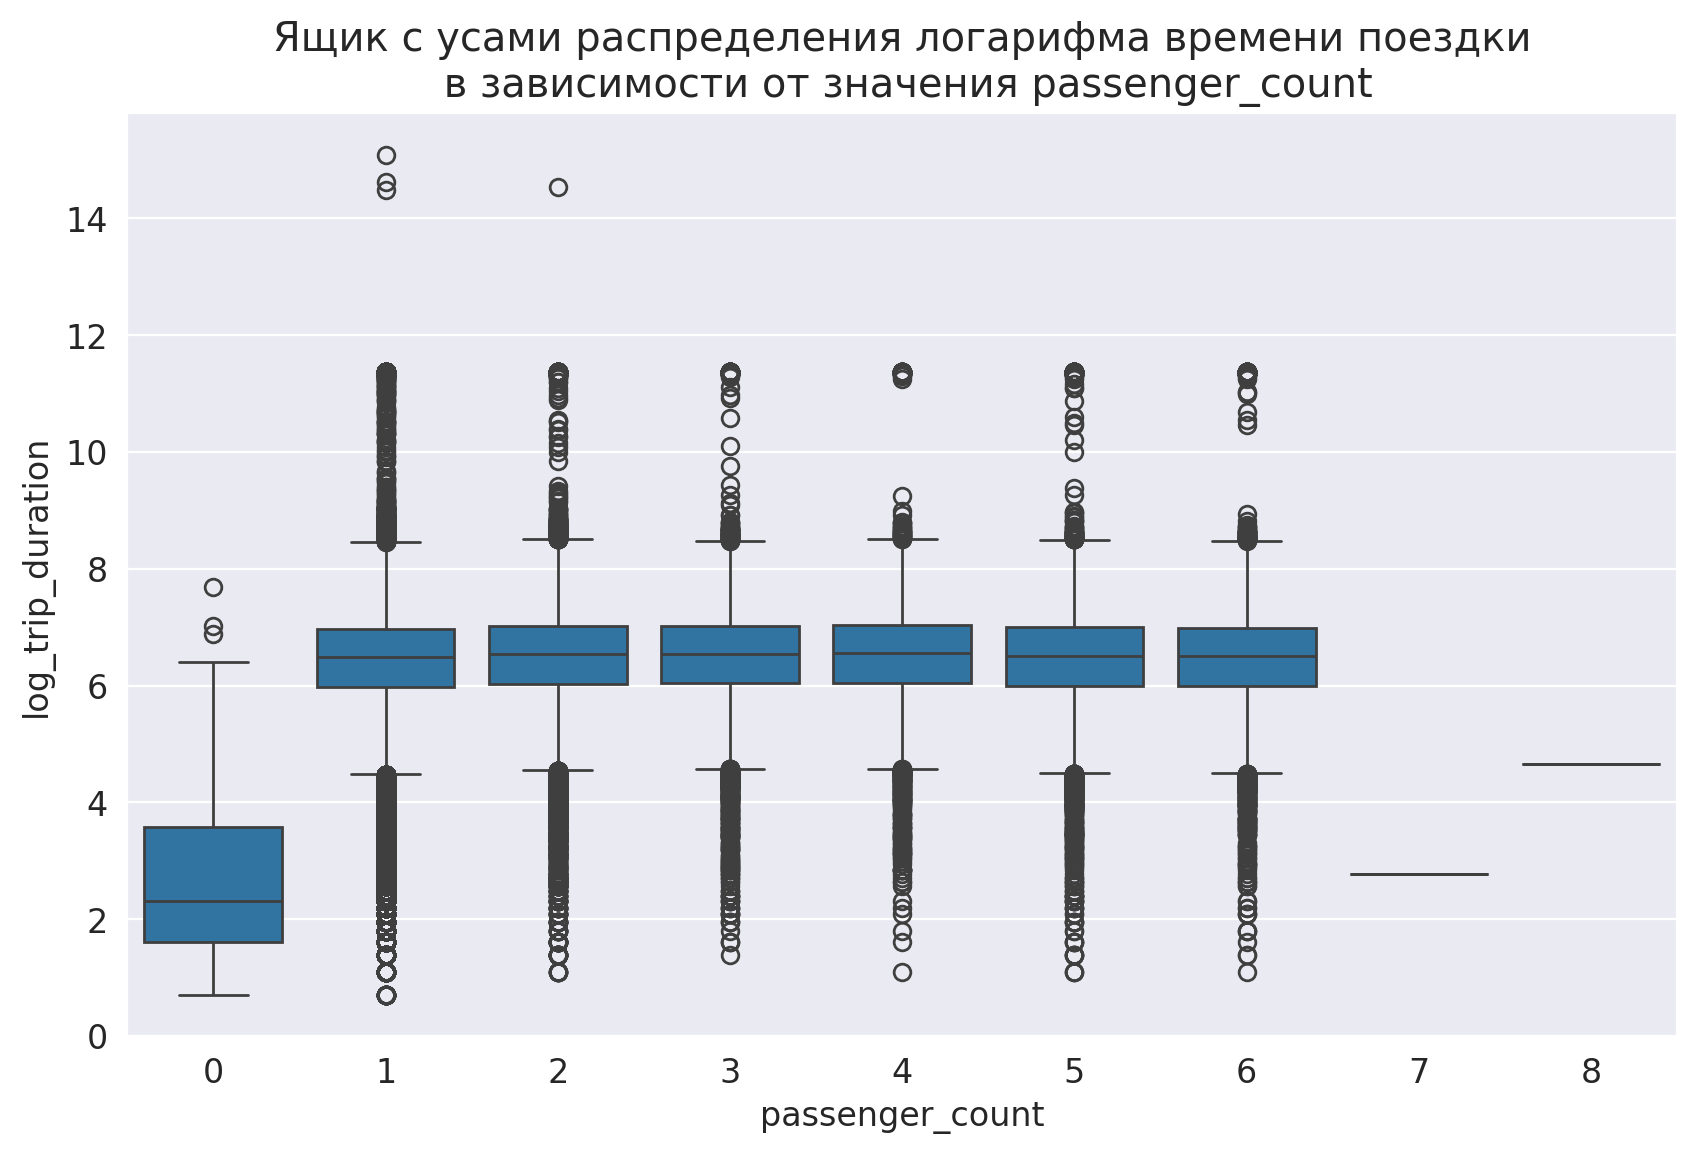

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'passenger_count', y = 'log_trip_duration', data = x_train)
ax.set_title('Ящик с усами распределения логарифма времени поездки\n в зависимости от значения passenger_count')

Text(0.5, 1.0, 'Ящик с усами распределения логарифма времени поездки\n в зависимости от значения store_and_fwd_flag')

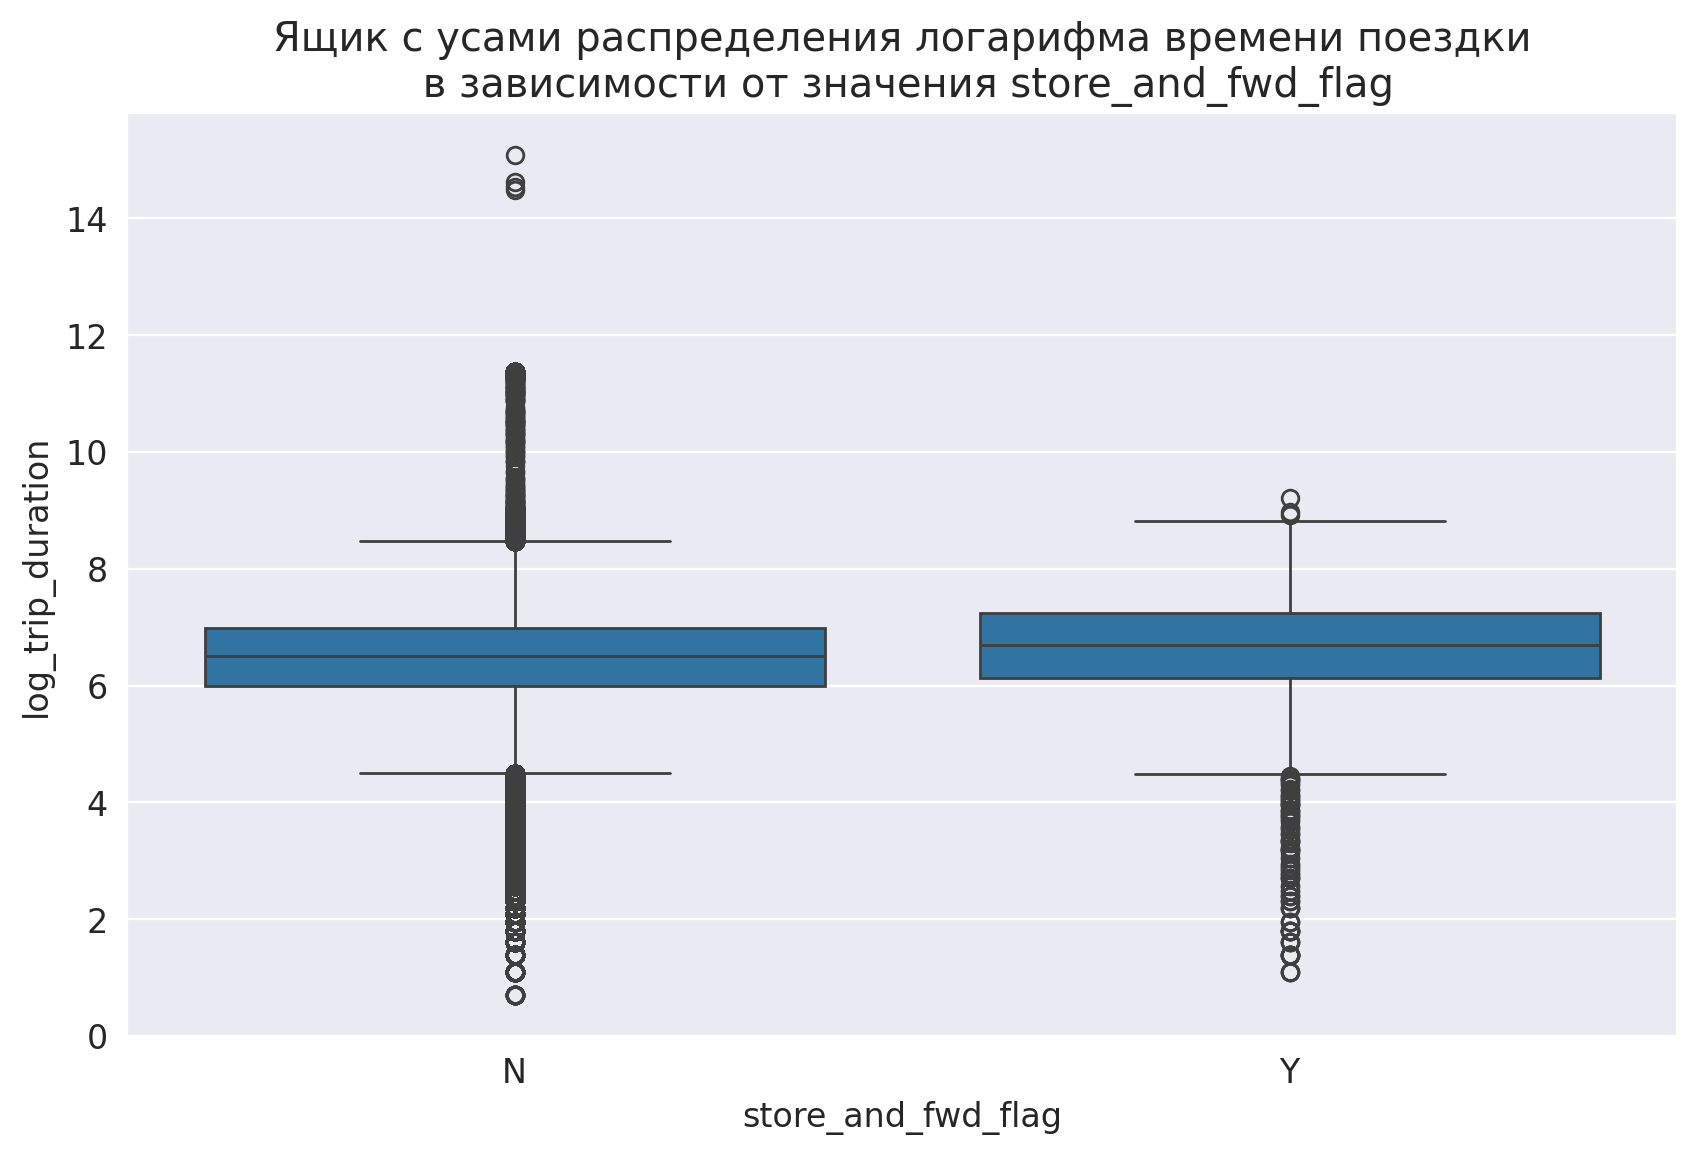

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = 'store_and_fwd_flag', y = 'log_trip_duration', data = x_train)
ax.set_title('Ящик с усами распределения логарифма времени поездки\n в зависимости от значения store_and_fwd_flag')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train.loc[(x_train['vendor_id'] == 2), 'vendor_id'] = 1
x_train.loc[(x_train['vendor_id'] == 1), 'vendor_id'] = 0
x_train.loc[(x_train['store_and_fwd_flag'] == 'Y'), 'store_and_fwd_flag'] = 1
x_train.loc[(x_train['store_and_fwd_flag'] == 'N'), 'store_and_fwd_flag'] = 0
x_test.loc[(x_test['vendor_id'] == 2), 'vendor_id'] = 1
x_test.loc[(x_test['vendor_id'] == 1), 'vendor_id'] = 0
x_test.loc[(x_test['store_and_fwd_flag'] == 'Y'), 'store_and_fwd_flag'] = 1
x_test.loc[(x_test['store_and_fwd_flag'] == 'N'), 'store_and_fwd_flag'] = 0

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Оказалось, что признаки не очень сильные, поскольку длительность поездки практически не различается. Единственное - в passenger_count есть отличие в поездках с нулем пассажиров. Однако скорее всего это сбои, поскольку как может быть поездка с нулем пассажиров - это тогда не такси уже.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x_train_copy_new = grid_transformer.fit().transform(x_train)
x_test_copy_new = grid_transformer.fit().transform(x_test)
x_train_copy_new_1 = x_train_copy_new[['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly', 'probka_road',
                               'clear_road', 'is_LaGuardia_airport_pick', 'is_LaGuardia_airport_drop', 'is_Kennedy_airport_pick',
                               'is_Kennedy_airport_drop', 'pickup_cell', 'dropoff_cell', 'log_haversine', 'vendor_id', 'passenger_count',
                                       'store_and_fwd_flag']]

x_test_copy_new_1 = x_test_copy_new[['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly', 'probka_road',
                               'clear_road', 'is_LaGuardia_airport_pick', 'is_LaGuardia_airport_drop', 'is_Kennedy_airport_pick',
                               'is_Kennedy_airport_drop', 'pickup_cell', 'dropoff_cell', 'log_haversine','vendor_id', 'passenger_count',
                                       'store_and_fwd_flag']]

categorical = ['day_of_trip', 'month_of_trip', 'day_of_week', 'hour_of_trip', 'is_first_anomaly', 'is_second_anomaly', 'probka_road',
                               'clear_road', 'is_LaGuardia_airport_pick', 'is_LaGuardia_airport_drop', 'is_Kennedy_airport_pick',
                               'is_Kennedy_airport_drop', 'pickup_cell', 'dropoff_cell','vendor_id', 'passenger_count',
                                       'store_and_fwd_flag']

numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features),
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])
model = pipeline.fit(x_train_copy_new_1, y_train)
y_pred = model.predict(x_test_copy_new_1)
print("Test RMSLE = %.4f" % rmsle(y_test, y_pred))


Test RMSLE = 0.4689


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

И вправду, ошибка модели улучшилась лишь на 2 десятитысячные. Значит, признаки можно выбросить из x_train и x_test

In [ ]:
x_train.drop(columns = ['vendor_id', 'store_and_fwd_flag', 'passenger_count'], inplace = True)
x_test.drop(columns = ['vendor_id', 'store_and_fwd_flag', 'passenger_count'], inplace = True)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

<Axes: xlabel='log_trip_duration', ylabel='Count'>

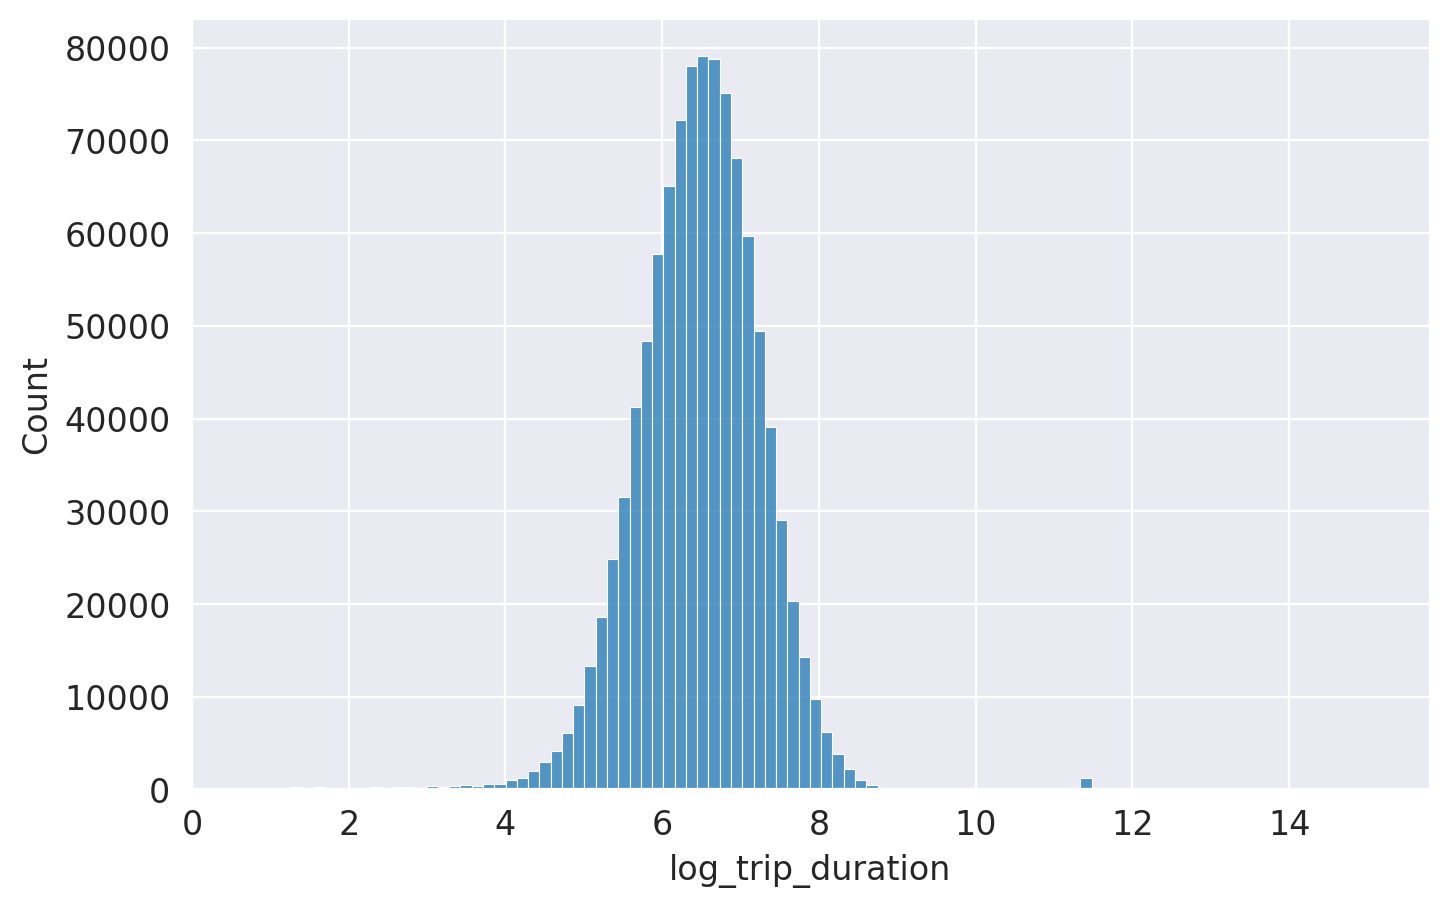

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots()
sns.histplot(x = 'log_trip_duration', ax = ax, data = x_train, bins = 100)

<Axes: xlabel='log_trip_duration', ylabel='Count'>

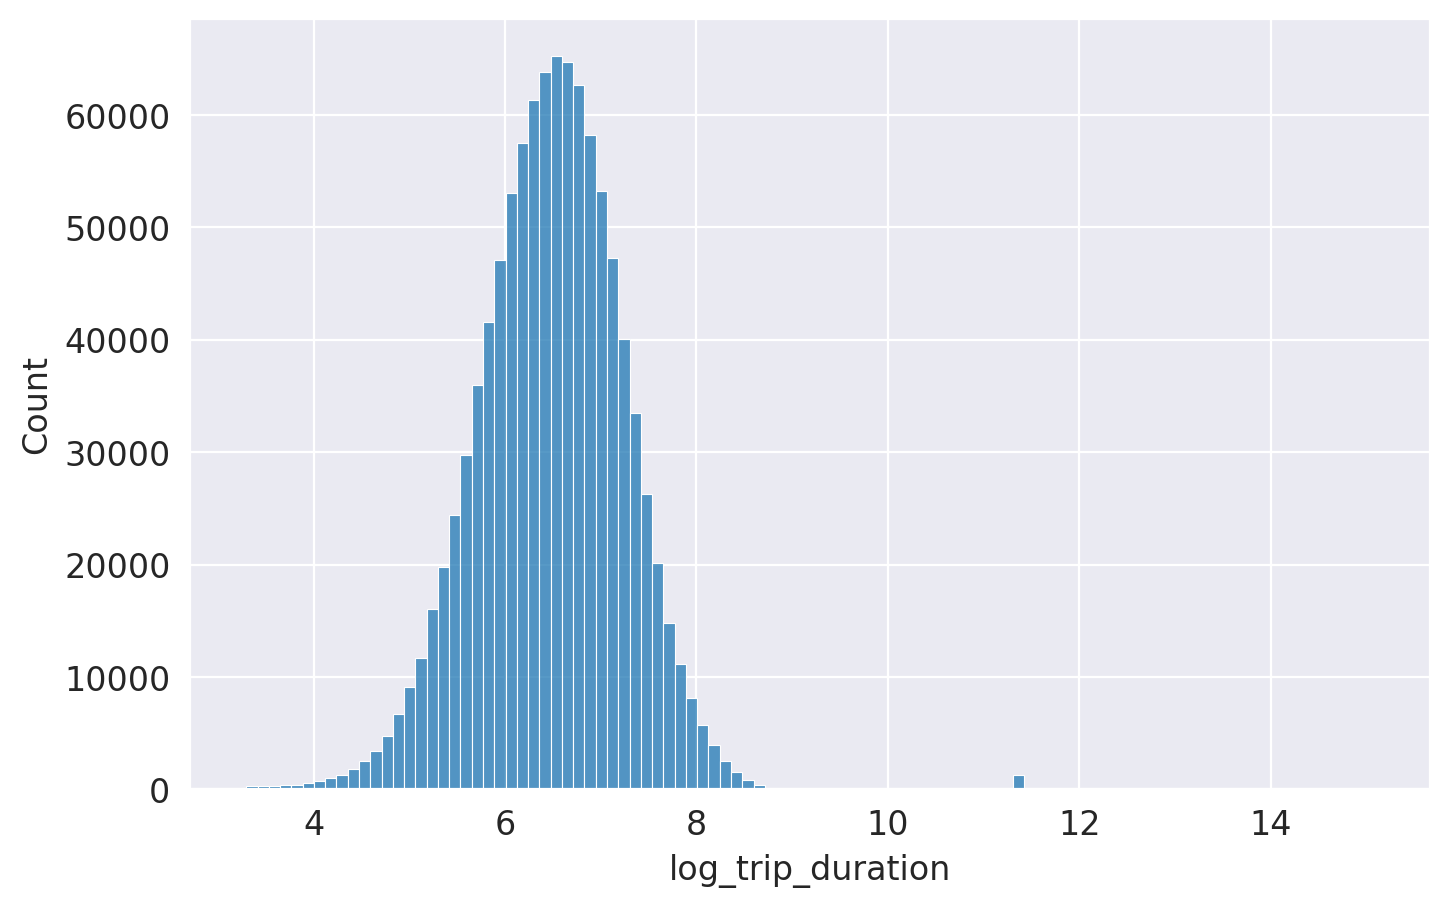

In [ ]:
mask = x_train['log_trip_duration'] >= np.percentile(x_train['log_trip_duration'], 0.3)
fig, ax = plt.subplots()
sns.histplot(x = 'log_trip_duration', ax = ax, data = x_train[mask], bins = 100)

In [ ]:
x_train.drop(x_train[~mask].index, inplace = True)

<Axes: xlabel='distance_haversine', ylabel='Count'>

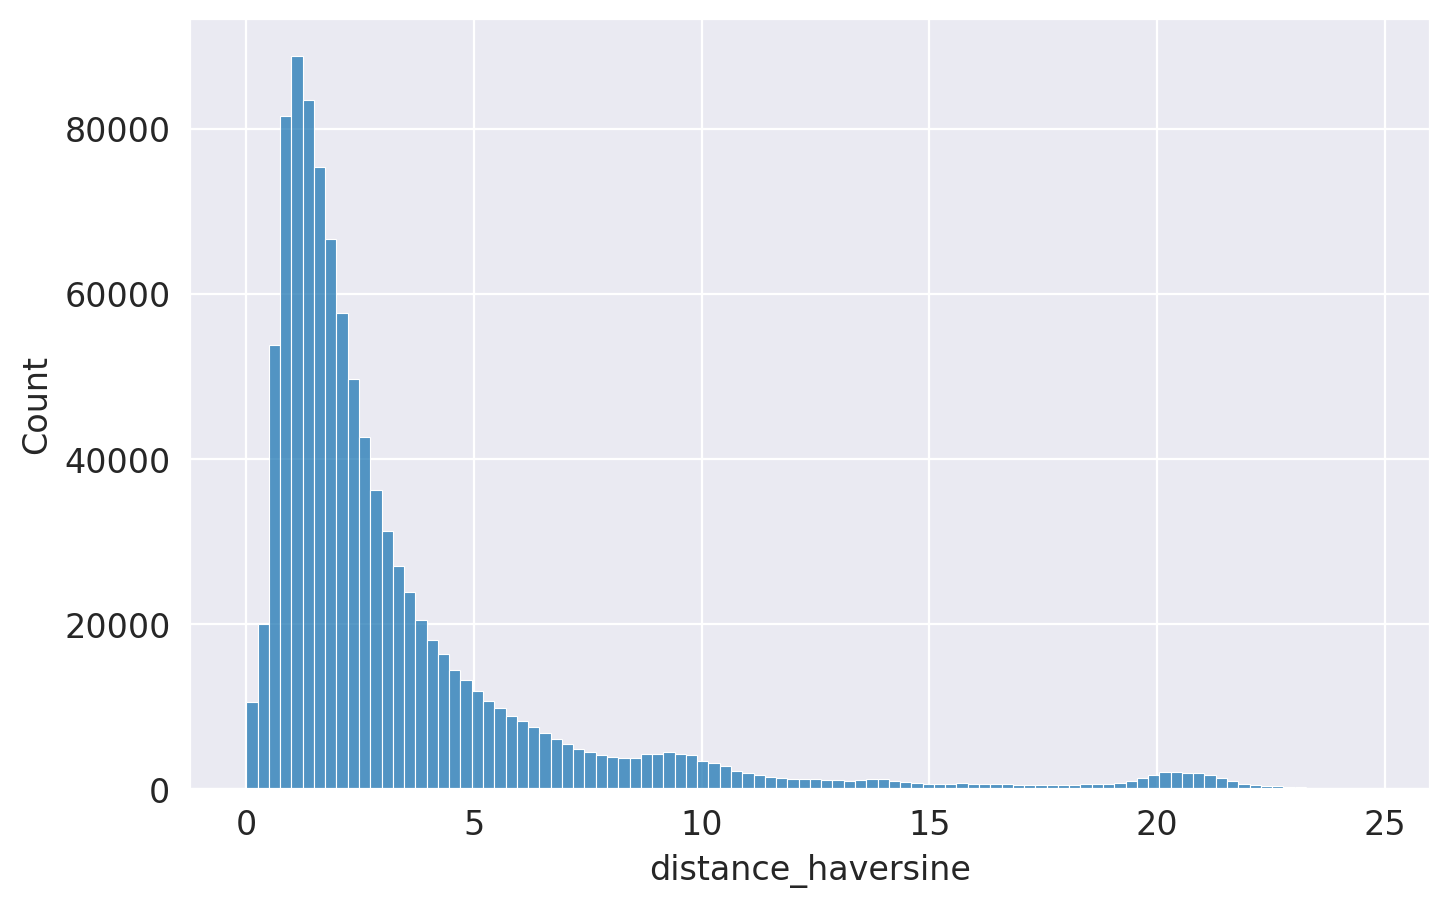

In [ ]:
mask = x_train['distance_haversine'] <= np.quantile(x_train['distance_haversine'], 0.999)
fig, ax = plt.subplots()
sns.histplot(x = 'distance_haversine', ax = ax, data = x_train[mask], bins = 100)

In [ ]:
x_train.drop(x_train[~mask].index, inplace = True)

<Axes: xlabel='log_trip_duration', ylabel='Count'>

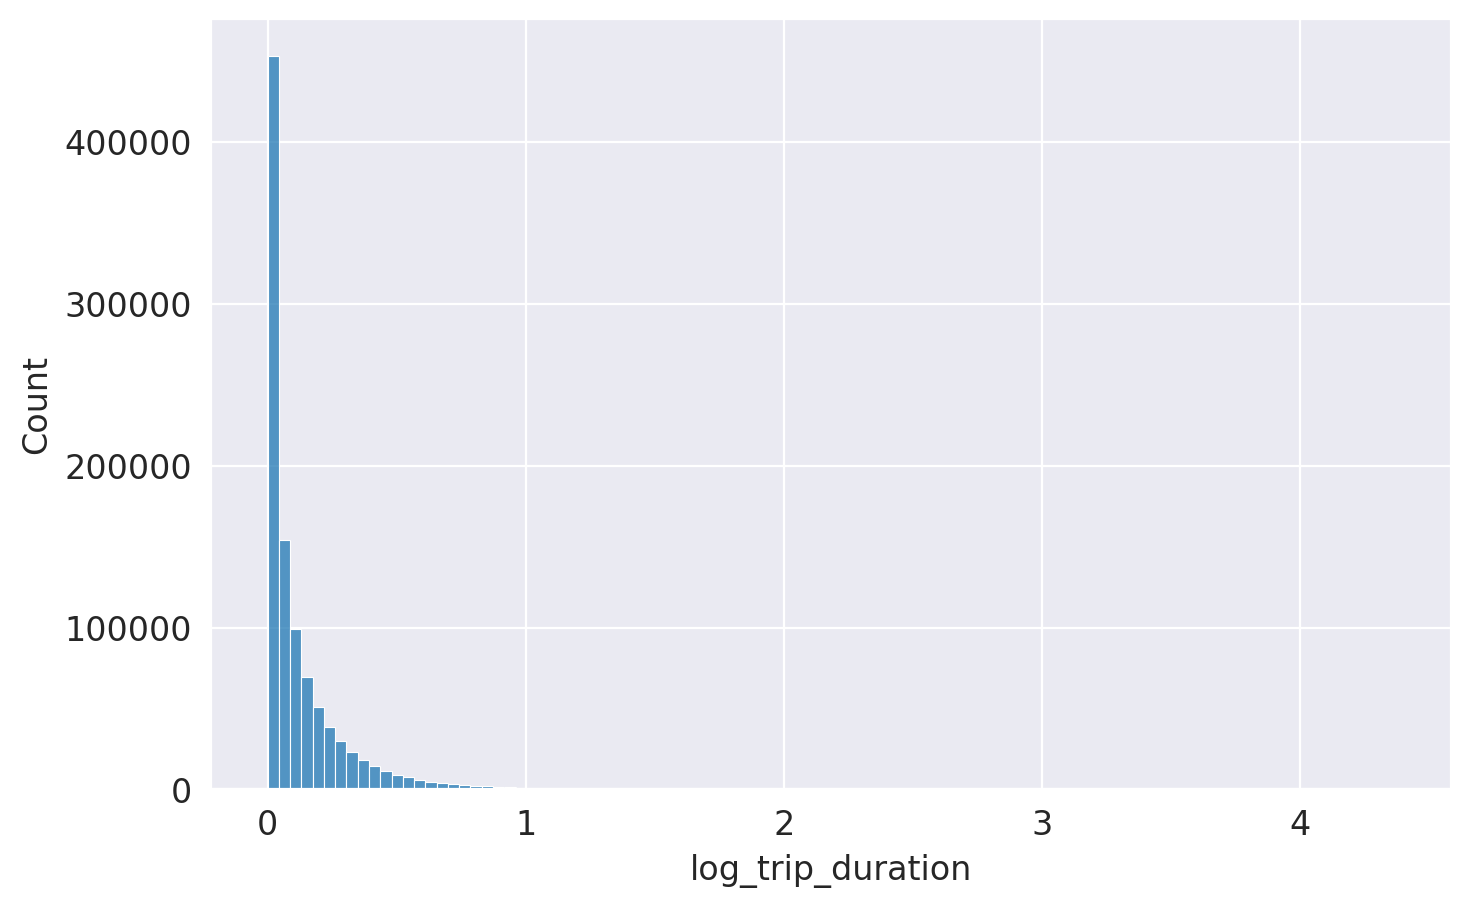

In [ ]:
#идея удаления ошибки: предитктим просто y_train_pred на нашей предпоследней регрессии(когда мы не использовали бесполезные признаки)
#затем смотрим на распределение ошибки, задаем квантиль ошибки, чтобы она не была очень большой
#заьем просто аналогично тому, как мы делали, удаляем строки

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сохраните наилучшее значение, как бенчмарк на будущее

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = ...

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.